# Einsendeaufgabe 2: Springende Bälle und Pendel (100 Punkte)

## Springende Bälle (60 Punkte)
In dieser Übung wollen wir einen NumPy Code entwickeln, den wir in der nächsten Übung optimieren. 

Wir wollen Bälle simulieren, die in einer Box herumspringen. Die Box sei von $x=[0,xmax]$ und $y=[0,ymax]$ definiert. Jede Kugel hat eine Koordinate $c=[x,y]$ und eine Geschwindigkeit $v=[v_x,v_y]$. In jedem Zeitschritt $\Delta t$ (dt) legt die Kugel eine gewisse Strecke zurück.

Es gilt nach den Regeln der Physik

$c[t+\Delta t]=c[t]+\Delta t*v(t)$. 

 
Zusätzlich wirkt in y-Richtung die Schwerkraft, welche die Geschwindigkeit verändert:
 
$v[t+\Delta t]=v[t]+\Delta t*g$. 


Wenn ein Ball an die Wand stößt, (also z.B. $c_0<=0$ oder $c_0>=xmax$ wird er reflektiert, das heißt in erster Näherung $v_0 = -1 * v_0$ für die Geschwindigkeit in dieser Richtung). Damit der Ball in diesem Fall nicht außerhalb der Box landet, müssen Sie berechnen, wie der Ball nun fliegt.

Der Ball stoppt nicht an der Wand, wenn er dort ankommt, sondern  fliegt noch ein Stück in die reflektierte Richtung. Um dies zu beachten, sollten wir die Rechnung noch etwas anpassen. 

Als Beispiel nehmen wir an, dass der Ball über $x=0$ hinaus fliegt.  Wenn wir also $c$ ausrechnen, gilt:  $c_x = c_x + v_x*\Delta t < 0 $.

Damit können wir ausrechnen, wie lange ($\Delta t_2$) unser Ball in die reflektierte Richtung geflogen ist: 

$abs(c_x)=\Delta t_2 * v_x$

also gilt:   
 
$\Delta t_2= \frac{abs(c_x)}{v_x}$. 

Für diese Zeit fliegt der Ball in die andere Richtung. Es gilt also 

$c_x = \Delta t_2 * (-v_x) = abs(c_x)$

<!-- BEGIN QUESTION -->

**Aufgabe:** Implementieren Sie die Funktion `timestep`, welche *einen* Zeitschritt für *einen Ball* simuliert. 

**Hinweis**:
- Die Entscheidungen, die Sie hier treffen, haben großen Einfluss auf die Performance. Es ist sehr wichtig, geeignete Kontroll- und Datenstrukturen zu wählen, um Overhead durch zu viele Objekte oder unnötige Kopien zu vermeiden.
- Wir haben hier eine schrittweise Simulation, dabei ist die Größe der Zeitschritte entscheidend, d.h. der Ball sollte in einem Zeitschritt nicht zu viel Strecke zurück gelegt haben. Daher sollte gelten: $\Delta_t \ll v$. Außerdem soll der Ball sich auch etwas bewegen können, daher muss $xmax,ymax \gg v$ sein.

_Points:_ 5

In [ ]:
def timestep(c, v, dt, g, xmax, ymax):
    """
    Berechnet einen Zeitschritt für den Ball unter Einfluss von Gravitation,
    inklusive Kollisionserkennung mit Wänden und Energieverlust.

    Parameter:
    - c: aktuelle Position 
    - v: aktuelle Geschwindigkeit
    - dt: Zeitintervall
    - g: Gravitationsvektor
    - xmax, ymax: Begrenzung des Simulationsraums

    Rückgabewerte:
    - Neue Positionen und Geschwindigkeiten nach einem Zeitschritt
    """
    # Bewegungsgleichung unter Berücksichtigung der Gravitation
    v = v + dt * g
    c_new = c + dt * v

    # Kollision mit linken/rechten Wänden
    if c_new[0] < 0:  # Wenn der Ball die linke Wand trifft
        dt2 = abs(c_new[0]) / abs(v[0])
        v[0] *= -1
        c_new[0] = dt2 * v[0]
    elif c_new[0] > xmax:  # Wenn der Ball die rechte Wand trifft
        dt2 = (c_new[0] - xmax) / abs(v[0])
        v[0] *= -1
        c_new[0] = xmax - dt2 * v[0]

    # Kollision mit oberer/unterer Wand
    if c_new[1] < 0:  # Wenn der Ball den Boden trifft
        dt2 = abs(c_new[1]) / abs(v[1])
        v[1] *= -1
        c_new[1] = dt2 * v[1]
    elif c_new[1] > ymax:  # Wenn der Ball die obere Wand trifft
        dt2 = (c_new[1] - ymax) / abs(v[1])
        v[1] *= -1
        c_new[1] = ymax - dt2 * v[1]

    return c_new, v


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Aufgabe:** Animieren Sie die Bewegung des Balls. Der Ball sollte mit der Zeit an Höhe verlieren (durch die Schwerkraft).

Hinweis: Simulation und Visualisierung müssen getrennt sein (für die nächste Aufgabe).

_Points:_ 5

GIF wurde gespeichert: ball_simulation.gif
Simulation (mit Visualisierung) war erfolgreich


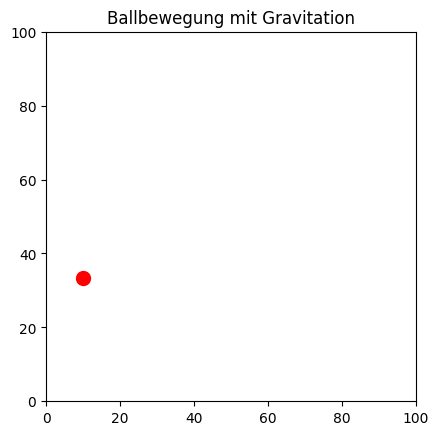

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# ------------------------------
# PHYSIKALISCHE PARAMETER
# ------------------------------

# Zeitintervall (in Sekunden)
dt = 0.1

# Gravitationsvektor (Beschleunigung in y-Richtung)
g = np.array([0, -9.81], dtype=np.float64)

# Begrenzung des Simulationsraums
xmax = 100 
ymax = 100

# Anzahl an Simulationsschritten
steps = 1000

# Flag zur Aktivierung der Visualisierung (Trennung der Simulation und Visualisierung)
visualize = True

# ------------------------------
# INITIALISIERUNG DER POSITION UND GESCHWINDIGKEIT
# ------------------------------
# Startzustand
pos = np.array([20.0, 80.0])  # Startposition des Balls (x, y)
vel = np.array([10.0, 10.0])   # Startgeschwindigkeit des Balls (vx, vy)

# ------------------------------
# SIMULATIONSFUNKTIONEN
# ------------------------------

def timestep(c, v, dt, g, xmax, ymax):
    """
    Berechnet einen Zeitschritt für den Ball unter Einfluss von Gravitation,
    inklusive Kollisionserkennung mit Wänden und Energieverlust.

    Parameter:
    - c: aktuelle Position 
    - v: aktuelle Geschwindigkeit
    - dt: Zeitintervall
    - g: Gravitationsvektor
    - xmax, ymax: Begrenzung des Simulationsraums

    Rückgabewerte:
    - Neue Positionen und Geschwindigkeiten nach einem Zeitschritt
    """
    # Bewegungsgleichung unter Berücksichtigung der Gravitation
    v = v + dt * g
    c_new = c + dt * v

    # Kollision mit linken/rechten Wänden
    if c_new[0] <= 0:  # Wenn der Ball die linke Wand trifft
        dt2 = abs(c_new[0]) / abs(v[0])
        v[0] *= -1
        c_new[0] = dt2 * v[0]
    elif c_new[0] >= xmax:  # Wenn der Ball die rechte Wand trifft
        dt2 = (c_new[0] - xmax) / abs(v[0])
        v[0] *= -1
        c_new[0] = xmax - dt2 * v[0]

    # Kollision mit oberer/unterer Wand
    if c_new[1] <= 0:  # Wenn der Ball den Boden trifft
        dt2 = abs(c_new[1]) / abs(v[1])
        v[1] *= -1
        c_new[1] = dt2 * v[1]
    elif c_new[1] >= ymax:  # Wenn der Ball die obere Wand trifft
        dt2 = (c_new[1] - ymax) / abs(v[1])
        v[1] *= -1
        c_new[1] = ymax - dt2 * v[1]

    return c_new, v


# Berechne Positionen und Geschwindigkeiten für die Anzahl der Schritte
def simulate_ball_with_vis (steps, pos, vel, dt, g, xmax, ymax):
    """
    Führt die Simulation durch und berechnet Bewegungen über mehrere Schritte.

    Die Positionen werden für eine spätere Animation gespeichert (visualize = True).

    Parameter:
    - steps: Anzahl der Simulationsschritte
    - dt: Zeitintervall
    - g: Gravitationsvektor
    - xmax, ymax: Begrenzungen des Raums

    Rückgabewerte:
    - Liste aller Positionen
    """
    
    # Speicherung der Positionen für Visualisierung
    positions = [pos.copy()]
    
    #  Schrittweise Simulation  
    for i in range(steps):
        pos, vel = timestep(pos, vel, dt, g, xmax, ymax)
        positions.append(pos.copy())  # Füge die neue Position hinzu
            
    return positions

        
def simulate_ball_without_vis (steps, pos, vel, dt, g, xmax, ymax):
    """
    Führt die Simulation durch und berechnet Bewegungen über mehrere Schritte.

    Die Positionen werden NICHT für eine spätere Animation gespeichert (visualize = False).

    Parameter:
    - steps: Anzahl der Simulationsschritte
    - pos: Anfangspositionen des Balls
    - vel: Anfangsgeschwindigkeiten des Balls
    - dt: Zeitintervall
    - g: Gravitationsvektor
    - xmax, ymax: Begrenzungen des Raumes

    Rückgabewerte:
    - Nur Statusmeldung
    """
   
    #  Schrittweise Simulation  
    for i in range(steps):
        pos, vel = timestep(pos, vel, dt, g, xmax, ymax)
            
    return


# ------------------------------
# VISUALISIERUNG
# ------------------------------

def animate_positions(positions, xmax, ymax, filename="ball_simulation.gif"):
    """
    Erstellt eine Animation der gespeicherten Positionen und speichert sie als GIF.

    Parameter:
    - positions: Liste der Positionen des Balls pro Frame
    - xmax, ymax: Grenzen des Simulationsraums
    - filename: Dateiname für das exportierte GIF
    """
    # Plot setup
    fig, ax = plt.subplots()
    ball, = ax.plot([], [], 'ro', markersize=10)  # Erstelle den Ball als roten Punkt
    ax.set_xlim(0, xmax)  # x-Achsen-Bereich
    ax.set_ylim(0, ymax)  # y-Achsen-Bereich
    ax.set_aspect('equal')  # Gleiche Skalierung auf beiden Achsen
    ax.set_title("Ballbewegung mit Gravitation")  # Titel des Plots

    # Init-Funktion für das Plot
    def init():
        ball.set_data([], [])  # Setze den Ball an den Anfang (leer)
        return ball,

    # Update-Funktion für das Plot
    def update(frame):
        pos = positions[frame]  # Hole die Position des Balls für das aktuelle Frame
        ball.set_data([pos[0]], [pos[1]])  # Setze die Position des Balls im Plot
        return ball,

    # Animation erstellen
    ani = FuncAnimation(fig, update, frames=len(positions), init_func=init, blit=True, interval=50)

    # Als GIF speichern
    ani.save(filename, writer=PillowWriter(fps=20))
    print(f"GIF wurde gespeichert: {filename}")
    
# ------------------------------
# HAUPTFUNKTION
# ------------------------------

if visualize == True:
    # Führe Simulation mit Visualisierung durch und animiere das Ergebnis
    all_positions = simulate_ball_with_vis(
        steps, pos, vel, dt, g, xmax, ymax
    )
    animate_positions(all_positions, xmax, ymax)
    print("Simulation (mit Visualisierung) war erfolgreich")
else:
    # Nur reine Simulation ohne Animation
    simulate_ball_without_vis(
        steps, pos, vel, dt, g, xmax, ymax
    )
    print("Simulation (ohne Visualisierung) war erfolgreich")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Aufgabe:** Ein Ball ist jedoch langweilig, daher wollen wir als nächstes mehrere Bälle simulieren.  
Schreiben Sie eine neue Funktion, `timestep_balls`, welche einen Array mit Koordinaten (shape=(N,2)) und einen Array mit Geschwindigkeiten (shape=(N,2)) übergeben bekommt und für alle Bälle einen Zeitschritt berechnet. 

Achten Sie darauf, dass der Code performant ist und verwenden Sie NumPys interne Vektorisierung mit der Slicing Syntax.  Für den Augenblick ignorieren wir, dass die Bälle zusammenstoßen können. 

Hinweis: 
- Das Array `c` sollte diese Form haben: 

$c = \left[\begin{array}{rr}                                 
x_0 & y_0 \\ 
x_1 & y_1 \\ 
x_2 & y_2 \\ 
\dots \\ 
x_{n-1} & y_{n-1} \\ 
\end{array}\right]$ 

- Das Array `v` sollte diese Form haben: 

$v = \left[\begin{array}{rr}                                 
v^x_0 & v^y_0 \\ 
v^x_1 & v^y_1 \\ 
v^x_2 & v^y_2 \\ 
\dots\\ 
v^x_{n-1} & v^y_{n-1} \\ 
\end{array}\right]$ 

_Points:_ 10

In [ ]:
def timestep_balls(c, v, dt, g, xmax, ymax):
    """
    Berechnet einen Zeitschritt für alle Bälle unter Einfluss von Gravitation,
    inklusive Kollisionserkennung mit Wänden und Energieverlust.

    Parameter:
    - c: aktuelle Positionen (NumPy-Array der Form [n, 2])
    - v: aktuelle Geschwindigkeiten (NumPy-Array der Form [n, 2])
    - dt: Zeitintervall
    - g: Gravitationsvektor
    - xmax, ymax: Begrenzung des Simulationsraums

    Rückgabewerte:
    - Neue Positionen und Geschwindigkeiten nach einem Zeitschritt
    """
    # Bewegungsgleichung unter Berücksichtigung der Gravitation
    v = v + dt * g
    c_new = c + dt * v
    

    # Kollision mit linken/rechten Wänden
    left_wall = c_new[:, 0] <= 0 # NumPy Verktorisierung der Vergleichoperation <=
    right_wall = c_new[:, 0] >= xmax # NumPy Verktorisierung der Vergleichoperation >=
    if np.any(left_wall | right_wall):
        dt2_left_wall = abs(c_new[left_wall, 0]) / abs(v[left_wall, 0]) # NumPy Vektorisierung für /-Operation
        dt2_right_wall = (abs(c_new[right_wall,0]) - xmax) / abs(v[right_wall, 0]) # NumPy Vektorisierung für /-Operation
        v[left_wall | right_wall, 0] *= -1 # NumPy Vektorisierung für ODER-Operation von booleschen Arrays
        c_new[left_wall, 0] = dt2_left_wall * v[left_wall, 0] # NumPy Vektorisierung der Operation mit Matrizen
        c_new[right_wall, 0] = xmax - dt2_right_wall * v[right_wall, 0] # NumPy Vektorisierung der Operationen mit Matrizen

    # Kollision mit oberer/unterer Wandd
    bottom = c_new[:, 1] <= 0
    top = c_new[:, 1] >= ymax
    if np.any(bottom | top):
        dt2_bottom = abs(c_new[bottom, 1]) / abs(v[bottom, 1])
        dt2_top = (abs(c_new[top, 1]) - ymax) / abs(v[top, 1])
        v[bottom | top, 1] *= -1
        c_new[bottom, 1] = dt2_bottom * v[bottom, 1]
        c_new[top, 1] = ymax - dt2_top * v[top, 1]

    return c_new, v

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Aufgabe:** Animieren Sie die Bewegung der Bälle.

Tipp: Trennen Sie Simulation und Visualisierung.

_Points:_ 10

GIF gespeichert als: multi_ball_colored.gif
Simulation (mit Visualisierung) war erfolgreich


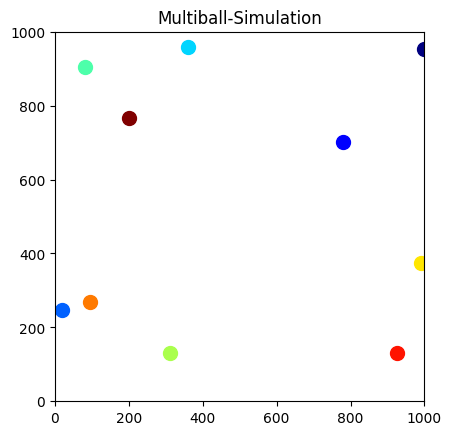

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# ------------------------------
# PHYSIKALISCHE PARAMETER
# ------------------------------

# Zeitintervall (in Sekunden)
dt = 1

# Gravitationsvektor (Beschleunigung in y-Richtung)
g = np.array([0, -9.81], dtype=np.float64)

# Begrenzung des Simulationsraums
xmax = 1000
ymax = 1000

# Anzahl an Simulationsschritten
steps = 1000

# Anzahl der simulierten Bälle
num_balls = 10

# Flag zur Aktivierung der Visualisierung (Trennung der Simulation und Visualisierung)
visualize = True


# ------------------------------
# INITIALISIERUNG DER POSITIONEN UND GESCHWINDIGKEITEN
# ------------------------------

rng = np.random.default_rng(seed=123)  # Zufallszahlengenerator für Reproduzierbarkeit

positions = xmax * rng.random((num_balls, 2))
velocities = 10 * rng.random((num_balls, 2))


# ------------------------------
# SIMULATIONSFUNKTIONEN
# ------------------------------

def timestep_balls(c, v, dt, g, xmax, ymax):
    """
    Berechnet einen Zeitschritt für alle Bälle unter Einfluss von Gravitation,
    inklusive Kollisionserkennung mit Wänden und Energieverlust.

    Parameter:
    - c: aktuelle Positionen (NumPy-Array der Form [n, 2])
    - v: aktuelle Geschwindigkeiten (NumPy-Array der Form [n, 2])
    - dt: Zeitintervall
    - g: Gravitationsvektor
    - xmax, ymax: Begrenzung des Simulationsraums

    Rückgabewerte:
    - Neue Positionen und Geschwindigkeiten nach einem Zeitschritt
    """
    # Bewegungsgleichung unter Berücksichtigung der Gravitation
    v = v + dt * g
    c_new = c + dt * v
    

    # Kollision mit linken/rechten Wänden
    left_wall = c_new[:, 0] <= 0 # NumPy Verktorisierung der Vergleichoperation <=
    right_wall = c_new[:, 0] >= xmax # NumPy Verktorisierung der Vergleichoperation >=
    if np.any(left_wall | right_wall):
        dt2_left_wall = abs(c_new[left_wall, 0]) / abs(v[left_wall, 0]) # NumPy Vektorisierung für /-Operation
        dt2_right_wall = (abs(c_new[right_wall,0]) - xmax) / abs(v[right_wall, 0]) # NumPy Vektorisierung für /-Operation
        v[left_wall | right_wall, 0] *= -1 # NumPy Vektorisierung für ODER-Operation von booleschen Arrays
        c_new[left_wall, 0] = dt2_left_wall * v[left_wall, 0] # NumPy Vektorisierung der Operation mit Matrizen
        c_new[right_wall, 0] = xmax - dt2_right_wall * v[right_wall, 0] # NumPy Vektorisierung der Operationen mit Matrizen

    # Kollision mit oberer/unterer Wandd
    bottom = c_new[:, 1] <= 0
    top = c_new[:, 1] >= ymax
    if np.any(bottom | top):
        dt2_bottom = abs(c_new[bottom, 1]) / abs(v[bottom, 1])
        dt2_top = (abs(c_new[top, 1]) - ymax) / abs(v[top, 1])
        v[bottom | top, 1] *= -1
        c_new[bottom, 1] = dt2_bottom * v[bottom, 1]
        c_new[top, 1] = ymax - dt2_top * v[top, 1]

    return c_new, v

def simulate_multiple_balls_with_vis(positions, velocities, steps, dt, g, xmax, ymax):
    """
    Führt die Mehrball-Simulation durch und berechnet Bewegungen über mehrere Schritte.

    Die Positionen werden für eine spätere Animation gespeichert (visualize = True).

    Parameter:
    - num_balls: Anzahl der Bälle
    - positions: Anfangspositionen der Bälle
    - velocities: Anfangsgeschwindigkeiten der Bälle
    - steps: Anzahl der Simulationsschritte
    - dt: Zeitintervall
    - g: Gravitationsvektor
    - xmax, ymax: Begrenzungen des Raumes

    Rückgabewerte:
    - Liste aller Positionen (falls vis=True)
    """
    # Speicherung der Positionen für Visualisierung
    all_positions = [positions.copy()]

    #  Schrittweise Simulation
    for i in range(steps):
        # Aktualisiere Positionen und Geschwindigkeiten
        positions, velocities = timestep_balls(positions, velocities, dt, g, xmax, ymax)
        all_positions.append(positions.copy())

    return all_positions

        
def simulate_multiple_balls_without_vis(positions, velocities, steps, dt, g, xmax, ymax):
    """
    Führt die Mehrball-Simulation durch und berechnet Bewegungen über mehrere Schritte.

    Die Positionen werden NICHT für eine spätere Animation gespeichert (visualize = False).

    Parameter:
    - num_balls: Anzahl der Bälle
    - positions: Anfangspositionen der Bälle
    - velocities: Anfangsgeschwindigkeiten der Bälle
    - steps: Anzahl der Simulationsschritte
    - dt: Zeitintervall
    - g: Gravitationsvektor
    - xmax, ymax: Begrenzungen des Raumes

    Rückgabewerte:
    - Nur Statusmeldung
    """

    #  Schrittweise Simulation
    for i in range(steps):
        # Aktualisiere Positionen und Geschwindigkeiten
        positions, velocities = timestep_balls(positions, velocities, dt, g, xmax, ymax)

    return

# ------------------------------
# VISUALISIERUNG
# ------------------------------

def animate_positions(all_positions, num_balls, xmax, ymax, filename="multi_ball_colored.gif"):
    """
    Erstellt eine Animation der gespeicherten Positionen und speichert sie als GIF.

    Parameter:
    - all_positions: Liste der Positionen aller Bälle pro Frame
    - num_balls: Anzahl der Bälle
    - xmax, ymax: Grenzen des Simulationsbereichs
    - filename: Dateiname für das exportierte GIF
    """
    colors = plt.cm.jet(np.linspace(0, 1, num_balls))  # Farbverlauf für Unterscheidung
    fig, ax = plt.subplots()
    ax.set_xlim(0, xmax)
    ax.set_ylim(0, ymax)
    ax.set_aspect('equal')
    ax.set_title("Multiball-Simulation")

    # Erzeuge ein Plot-Objekt pro Ball
    balls_plots = [ax.plot([], [], 'o', color=colors[i], markersize=10)[0] for i in range(num_balls)]
    
    # Init-Funktion für das Plot
    def init():
        # Leere Startdaten
        for ball in balls_plots:
            ball.set_data([], [])
        return balls_plots
        
    # Update-Funktion für das Plot
    def update(frame):
        # Update Positionen für jeden Frame
        pos = all_positions[frame]
        for i, ball in enumerate(balls_plots):
            ball.set_data([pos[i, 0]], [pos[i, 1]])
        return balls_plots

    ani = FuncAnimation(fig, update, frames=len(all_positions), init_func=init, blit=True, interval=50)
    ani.save(filename, writer=PillowWriter(fps=20))
    print(f"GIF gespeichert als: {filename}")

# ------------------------------
# HAUPTFUNKTION
# ------------------------------

if visualize == True:
    # Führe Simulation mit Visualisierung durch und animiere das Ergebnis
    all_positions = simulate_multiple_balls_with_vis(
        positions, velocities, steps, dt, g, xmax, ymax
    )
    animate_positions(all_positions, num_balls, xmax, ymax)
    print("Simulation (mit Visualisierung) war erfolgreich")
else:
    # Nur reine Simulation ohne Animation
    simulate_multiple_balls_without_vis(
        positions, velocities, steps, dt, g, xmax, ymax
    )
    print("Simulation (ohne Visualisierung) war erfolgreich")


<!-- END QUESTION -->

## Leistungsanalyse ohne Visualisierung

<!-- BEGIN QUESTION -->

**Aufgabe:** Analysieren Sie zunächst die Leistung der Ball-Simulation ohne Visualisierung mit Scalene!
Simulieren Sie dazu 100 Bälle für 100 Zeitschritte und verwenden Sie eine Abtastfrequenz von $0.0001$.

*Hinweis:* Wir haben die Initialisierungsfunktion aus dem Profiling entfernt, da sie ansonsten zu dominant wäre.
Wenn Sie den Code richtig optimiert haben, sollte die Funktion zu über 95% im nativen Modus ausgeführt werden.

_Points:_ 15

In [13]:
%load_ext scalene

The scalene extension is already loaded. To reload it, use:
  %reload_ext scalene


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# ------------------------------
# PHYSIKALISCHE PARAMETER
# ------------------------------

# Zeitintervall (in Sekunden)
dt = 1

# Gravitationsvektor (Beschleunigung in y-Richtung)
g = np.array([0, -9.81], dtype=np.float64)

# Begrenzung des Simulationsraums
xmax = 1000
ymax = 1000

# Anzahl an Simulationsschritten
steps = 10000

# Anzahl der simulierten Bälle
num_balls = 1000


# ------------------------------
# INITIALISIERUNG DER POSITIONEN UND GESCHWINDIGKEITEN
# ------------------------------

rng = np.random.default_rng(seed=123)  # Zufallszahlengenerator für Reproduzierbarkeit

positions = xmax * rng.random((num_balls, 2))
velocities = 10 * rng.random((num_balls, 2))

In [ ]:
%%scalene --cpu-sampling-rate 0.0001

# Flag zur Aktivierung der Visualisierung (Trennung der Simulation und Visualisierung)
visualize = False

# ------------------------------
# SIMULATIONSFUNKTIONEN
# ------------------------------

def timestep_balls(c, v, dt, g, xmax, ymax):
    """
    Berechnet einen Zeitschritt für alle Bälle unter Einfluss von Gravitation,
    inklusive Kollisionserkennung mit Wänden und Energieverlust.

    Parameter:
    - c: aktuelle Positionen (NumPy-Array der Form [n, 2])
    - v: aktuelle Geschwindigkeiten (NumPy-Array der Form [n, 2])
    - dt: Zeitintervall
    - g: Gravitationsvektor
    - xmax, ymax: Begrenzung des Simulationsraums

    Rückgabewerte:
    - Neue Positionen und Geschwindigkeiten nach einem Zeitschritt
    """
    # Bewegungsgleichung unter Berücksichtigung der Gravitation
    v = v + dt * g
    c_new = c + dt * v
    

    # Kollision mit linken/rechten Wänden
    left_wall = c_new[:, 0] <= 0 # NumPy Verktorisierung der Vergleichoperation <=
    right_wall = c_new[:, 0] >= xmax # NumPy Verktorisierung der Vergleichoperation >=
    if np.any(left_wall | right_wall):
        dt2_left_wall = abs(c_new[left_wall, 0]) / abs(v[left_wall, 0]) # NumPy Vektorisierung für /-Operation
        dt2_right_wall = (abs(c_new[right_wall,0]) - xmax) / abs(v[right_wall, 0]) # NumPy Vektorisierung für /-Operation
        v[left_wall | right_wall, 0] *= -1 # NumPy Vektorisierung für ODER-Operation von booleschen Arrays
        c_new[left_wall, 0] = dt2_left_wall * v[left_wall, 0] # NumPy Vektorisierung der Operation mit Matrizen
        c_new[right_wall, 0] = xmax - dt2_right_wall * v[right_wall, 0] # NumPy Vektorisierung der Operationen mit Matrizen

    # Kollision mit oberer/unterer Wandd
    bottom = c_new[:, 1] <= 0
    top = c_new[:, 1] >= ymax
    if np.any(bottom | top):
        dt2_bottom = abs(c_new[bottom, 1]) / abs(v[bottom, 1])
        dt2_top = (abs(c_new[top, 1]) - ymax) / abs(v[top, 1])
        v[bottom | top, 1] *= -1
        c_new[bottom, 1] = dt2_bottom * v[bottom, 1]
        c_new[top, 1] = ymax - dt2_top * v[top, 1]

    return c_new, v

def simulate_multiple_balls_with_vis(positions, velocities, steps, dt, g, xmax, ymax):
    """
    Führt die Mehrball-Simulation durch und berechnet Bewegungen über mehrere Schritte.

    Die Positionen werden für eine spätere Animation gespeichert (visualize = True).

    Parameter:
    - num_balls: Anzahl der Bälle
    - positions: Anfangspositionen der Bälle
    - velocities: Anfangsgeschwindigkeiten der Bälle
    - steps: Anzahl der Simulationsschritte
    - dt: Zeitintervall
    - g: Gravitationsvektor
    - xmax, ymax: Begrenzungen des Raumes

    Rückgabewerte:
    - Liste aller Positionen (falls vis=True)
    """
    # Speicherung der Positionen für Visualisierung
    all_positions = [positions.copy()]

    #  Schrittweise Simulation
    for i in range(steps):
        # Aktualisiere Positionen und Geschwindigkeiten
        positions, velocities = timestep_balls(positions, velocities, dt, g, xmax, ymax)
        all_positions.append(positions.copy())

    return all_positions

        
def simulate_multiple_balls_without_vis(positions, velocities, steps, dt, g, xmax, ymax):
    """
    Führt die Mehrball-Simulation durch und berechnet Bewegungen über mehrere Schritte.

    Die Positionen werden NICHT für eine spätere Animation gespeichert (visualize = False).

    Parameter:
    - num_balls: Anzahl der Bälle
    - positions: Anfangspositionen der Bälle
    - velocities: Anfangsgeschwindigkeiten der Bälle
    - steps: Anzahl der Simulationsschritte
    - dt: Zeitintervall
    - g: Gravitationsvektor
    - xmax, ymax: Begrenzungen des Raumes

    Rückgabewerte:
    - Nur Statusmeldung
    """

    #  Schrittweise Simulation
    for i in range(steps):
        # Aktualisiere Positionen und Geschwindigkeiten
        positions, velocities = timestep_balls(positions, velocities, dt, g, xmax, ymax)

    return

# ------------------------------
# VISUALISIERUNG
# ------------------------------

def animate_positions(all_positions, num_balls, xmax, ymax, filename="multi_ball_colored.gif"):
    """
    Erstellt eine Animation der gespeicherten Positionen und speichert sie als GIF.

    Parameter:
    - all_positions: Liste der Positionen aller Bälle pro Frame
    - num_balls: Anzahl der Bälle
    - xmax, ymax: Grenzen des Simulationsbereichs
    - filename: Dateiname für das exportierte GIF
    """
    colors = plt.cm.jet(np.linspace(0, 1, num_balls))  # Farbverlauf für Unterscheidung
    fig, ax = plt.subplots()
    ax.set_xlim(0, xmax)
    ax.set_ylim(0, ymax)
    ax.set_aspect('equal')
    ax.set_title("Multiball-Simulation")

    # Erzeuge ein Plot-Objekt pro Ball
    balls_plots = [ax.plot([], [], 'o', color=colors[i], markersize=10)[0] for i in range(num_balls)]
    
    # Init-Funktion für das Plot
    def init():
        # Leere Startdaten
        for ball in balls_plots:
            ball.set_data([], [])
        return balls_plots
        
    # Update-Funktion für das Plot
    def update(frame):
        # Update Positionen für jeden Frame
        pos = all_positions[frame]
        for i, ball in enumerate(balls_plots):
            ball.set_data([pos[i, 0]], [pos[i, 1]])
        return balls_plots

    ani = FuncAnimation(fig, update, frames=len(all_positions), init_func=init, blit=True, interval=50)
    ani.save(filename, writer=PillowWriter(fps=20))
    print(f"GIF gespeichert als: {filename}")

# ------------------------------
# HAUPTFUNKTION
# ------------------------------

if visualize == True:
    # Führe Simulation mit Visualisierung durch und animiere das Ergebnis
    all_positions = simulate_multiple_balls_with_vis(
        positions, velocities, steps, dt, g, xmax, ymax
    )
    # animate_positions(all_positions, num_balls, xmax, ymax)
    print("Simulation (mit Visualisierung) war erfolgreich")
else:
    # Nur reine Simulation ohne Animation
    simulate_multiple_balls_without_vis(
        positions, velocities, steps, dt, g, xmax, ymax
    )
    print("Simulation (ohne Visualisierung) war erfolgreich")


Simulation (ohne Visualisierung) war erfolgreich


Scalene: An exception of type ImportError occurred. Arguments:
("cannot import name 'display' from 'IPython.core.display' (/home/codespace/.local/lib/python3.12/site-packages/IPython/core/display.py)",)
Traceback (most recent call last):
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/scalene/scalene_profiler.py", line 2133, in run_profiler
    exit_status = profiler.profile_code(
                  ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/scalene/scalene_profiler.py", line 1868, in profile_code
    ScaleneJupyter.display_profile(
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/scalene/scalene_jupyter.py", line 35, in display_profile
    from IPython.core.display import display
ImportError: cannot import name 'display' from 'IPython.core.display' (/home/codespace/.local/lib/python3.12/site-packages/IPython/core/display.py)



<!-- END QUESTION -->

## Leistungsanalyse mit Visualisierung

<!-- BEGIN QUESTION -->

**Aufgabe:** Die Visualisierung erfordert, dass die Ergebnisse nach jeder Iteration gespeichert werden. Analysieren Sie mit Hilfe von Scalene, wie sich das auf die Performance auswirkt. 

- Wie viel der gesamten Laufzeit kostet dieses Kopieren der Ergebnisse?
- Wie lässt sich das verbessern?

_Points:_ 15

Die Leistungsanalyse wurde mithilfe Scalene für zwei Fälle - mit und ohne Visualisierung (`visualize=True` bzw. `False`) durchgeführt. Als Anfangsbedingungen wurden 1000 Bälle über 10000 Schritte simuliert. In beiden Fällen wurde die Funktion `animate_positions`, die für die Erstellung der Animation zuständig ist, deaktiviert, um den Einfluss des Speicherns der Ergebnisse für die Visualisierung isoliert zu betrachten.
Die Simulation mit Visualisierung ist etwa 25,78% langsamer als die Simulation ohne Speicherung der Daten (2,596s gegenüber 2,064s; siehe Screenshots unten).

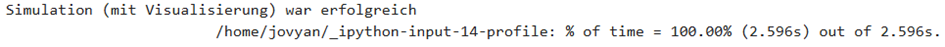

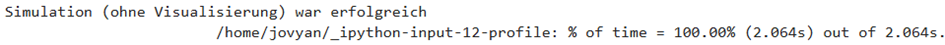

Das Scalene-Ergebnis für die Simulation ohne Visualisierung zeigt, dass der wiederholte Aufruf der Funktion `timestep_balls` den größten Einfluss auf die Laufzeit hat. Das ist zu erwarten, da diese Funktion innerhalb einer for-Schleife so oft aufgerufen wird, wie der Wert der Variablen `steps`  beträgt. Der Rechenaufwand wird somit gleichmäßig über die vielen Funktionsaufrufe verteilt.

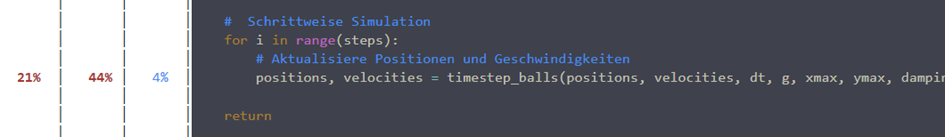

Im Gegensatz dazu zeigt das Ergebnis für die Simulation mit Visualisierung, dass der größte Anteil der Rechenressourcen für das Speichern der Daten im Array `all_positions` verwendet wird:

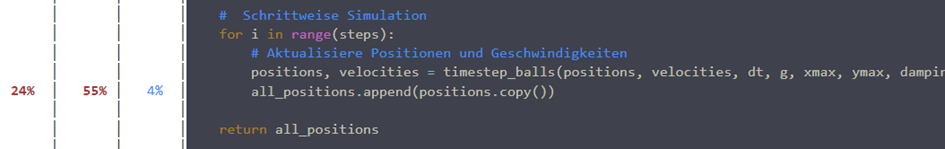

Die Zeile `all_positions.append(positions.copy())` ist deshalb besonders rechenintensiv, weil sie in jedem Simulationsschritt eine tiefe Kopie des NumPy-Arrays `positions` erstellt und diese in einer dynamisch wachsenden Python-Liste speichert. Die Liste wächst bei jeder Iteration, was bedeutet, dass Python regelmäßig neuen Speicher allokieren und die Inhalte im Speicher neu organisieren muss. Diese dynamischen Speicheroperationen sind teuer und verursachen signifikanten Rechenaufwand. Je mehr Bälle simuliert werden, desto mehr Speicher und Rechenzeit wird für jede Kopie benötigt.

Eine effizientere Lösung besteht darin, das Array `all_positions` vorab mit der Zielgröße zu initialisieren. Anstatt die Ergebnisse dynamisch in einer Liste zu speichern, wird ein NumPy-Array mit vordefinierter Größe verwendet. Dadurch werden die Positionsdaten direkt an der richtigen Stelle im Speicher abgelegt.
Dies vermeidet:
- die wiederholten `.append()`-Operationen,
- die Notwendigkeit von `.copy()`, und
- den Aufwand für die Speicherverwaltung

Beispiel für eine solche Optimierung:
<pre>
# Initialisierung von NumPy-Array der festen Größe
all_positions = np.empty((steps + 1, num_balls, 2), dtype=np.float64)
all_positions[0] = positions

for i in range(1, steps + 1):
    positions, velocities = timestep_balls(positions, velocities, dt, g, xmax, ymax, damping_factor)
    # Speichern von Daten im vorallokierten Speicherplatz
    all_positions[i] = positions
</pre>

Durch diese Vorinitialisierung wird der Speicher auf einen Schlag allokiert, was nicht nur Zeit spart, sondern auch die Speicherverwaltung vereinfacht und die Gesamtleistung der Simulation deutlich verbessert.

In [ ]:
%%scalene --cpu-sampling-rate 0.0001

# Flag zur Aktivierung der Visualisierung (Trennung der Simulation und Visualisierung)
visualize = True

# ------------------------------
# SIMULATIONSFUNKTIONEN
# ------------------------------

def timestep_balls(c, v, dt, g, xmax, ymax):
    """
    Berechnet einen Zeitschritt für alle Bälle unter Einfluss von Gravitation,
    inklusive Kollisionserkennung mit Wänden und Energieverlust.

    Parameter:
    - c: aktuelle Positionen (NumPy-Array der Form [n, 2])
    - v: aktuelle Geschwindigkeiten (NumPy-Array der Form [n, 2])
    - dt: Zeitintervall
    - g: Gravitationsvektor
    - xmax, ymax: Begrenzung des Simulationsraums

    Rückgabewerte:
    - Neue Positionen und Geschwindigkeiten nach einem Zeitschritt
    """
    # Bewegungsgleichung unter Berücksichtigung der Gravitation
    v = v + dt * g
    c_new = c + dt * v
    

    # Kollision mit linken/rechten Wänden
    left_wall = c_new[:, 0] <= 0 # NumPy Verktorisierung der Vergleichoperation <=
    right_wall = c_new[:, 0] >= xmax # NumPy Verktorisierung der Vergleichoperation >=
    if np.any(left_wall | right_wall):
        dt2_left_wall = abs(c_new[left_wall, 0]) / abs(v[left_wall, 0]) # NumPy Vektorisierung für /-Operation
        dt2_right_wall = (abs(c_new[right_wall,0]) - xmax) / abs(v[right_wall, 0]) # NumPy Vektorisierung für /-Operation
        v[left_wall | right_wall, 0] *= -1 # NumPy Vektorisierung für ODER-Operation von booleschen Arrays
        c_new[left_wall, 0] = dt2_left_wall * v[left_wall, 0] # NumPy Vektorisierung der Operation mit Matrizen
        c_new[right_wall, 0] = xmax - dt2_right_wall * v[right_wall, 0] # NumPy Vektorisierung der Operationen mit Matrizen

    # Kollision mit oberer/unterer Wandd
    bottom = c_new[:, 1] <= 0
    top = c_new[:, 1] >= ymax
    if np.any(bottom | top):
        dt2_bottom = abs(c_new[bottom, 1]) / abs(v[bottom, 1])
        dt2_top = (abs(c_new[top, 1]) - ymax) / abs(v[top, 1])
        v[bottom | top, 1] *= -1
        c_new[bottom, 1] = dt2_bottom * v[bottom, 1]
        c_new[top, 1] = ymax - dt2_top * v[top, 1]

    return c_new, v

def simulate_multiple_balls_with_vis(positions, velocities, steps, dt, g, xmax, ymax):
    """
    Führt die Mehrball-Simulation durch und berechnet Bewegungen über mehrere Schritte.

    Die Positionen werden für eine spätere Animation gespeichert (visualize = True).

    Parameter:
    - num_balls: Anzahl der Bälle
    - positions: Anfangspositionen der Bälle
    - velocities: Anfangsgeschwindigkeiten der Bälle
    - steps: Anzahl der Simulationsschritte
    - dt: Zeitintervall
    - g: Gravitationsvektor
    - xmax, ymax: Begrenzungen des Raumes

    Rückgabewerte:
    - Liste aller Positionen (falls vis=True)
    """
    # Speicherung der Positionen für Visualisierung
    all_positions = [positions.copy()]

    #  Schrittweise Simulation
    for i in range(steps):
        # Aktualisiere Positionen und Geschwindigkeiten
        positions, velocities = timestep_balls(positions, velocities, dt, g, xmax, ymax)
        all_positions.append(positions.copy())

    return all_positions

        
def simulate_multiple_balls_without_vis(positions, velocities, steps, dt, g, xmax, ymax):
    """
    Führt die Mehrball-Simulation durch und berechnet Bewegungen über mehrere Schritte.

    Die Positionen werden NICHT für eine spätere Animation gespeichert (visualize = False).

    Parameter:
    - num_balls: Anzahl der Bälle
    - positions: Anfangspositionen der Bälle
    - velocities: Anfangsgeschwindigkeiten der Bälle
    - steps: Anzahl der Simulationsschritte
    - dt: Zeitintervall
    - g: Gravitationsvektor
    - xmax, ymax: Begrenzungen des Raumes

    Rückgabewerte:
    - Nur Statusmeldung
    """

    #  Schrittweise Simulation
    for i in range(steps):
        # Aktualisiere Positionen und Geschwindigkeiten
        positions, velocities = timestep_balls(positions, velocities, dt, g, xmax, ymax)

    return

# ------------------------------
# VISUALISIERUNG
# ------------------------------

def animate_positions(all_positions, num_balls, xmax, ymax, filename="multi_ball_colored.gif"):
    """
    Erstellt eine Animation der gespeicherten Positionen und speichert sie als GIF.

    Parameter:
    - all_positions: Liste der Positionen aller Bälle pro Frame
    - num_balls: Anzahl der Bälle
    - xmax, ymax: Grenzen des Simulationsbereichs
    - filename: Dateiname für das exportierte GIF
    """
    colors = plt.cm.jet(np.linspace(0, 1, num_balls))  # Farbverlauf für Unterscheidung
    fig, ax = plt.subplots()
    ax.set_xlim(0, xmax)
    ax.set_ylim(0, ymax)
    ax.set_aspect('equal')
    ax.set_title("Multiball-Simulation")

    # Erzeuge ein Plot-Objekt pro Ball
    balls_plots = [ax.plot([], [], 'o', color=colors[i], markersize=10)[0] for i in range(num_balls)]
    
    # Init-Funktion für das Plot
    def init():
        # Leere Startdaten
        for ball in balls_plots:
            ball.set_data([], [])
        return balls_plots
        
    # Update-Funktion für das Plot
    def update(frame):
        # Update Positionen für jeden Frame
        pos = all_positions[frame]
        for i, ball in enumerate(balls_plots):
            ball.set_data([pos[i, 0]], [pos[i, 1]])
        return balls_plots

    ani = FuncAnimation(fig, update, frames=len(all_positions), init_func=init, blit=True, interval=50)
    ani.save(filename, writer=PillowWriter(fps=20))
    print(f"GIF gespeichert als: {filename}")

# ------------------------------
# HAUPTFUNKTION
# ------------------------------

if visualize == True:
    # Führe Simulation mit Visualisierung durch und animiere das Ergebnis
    all_positions = simulate_multiple_balls_with_vis(
        positions, velocities, steps, dt, g, xmax, ymax
    )
    # animate_positions(all_positions, num_balls, xmax, ymax)
    print("Simulation (mit Visualisierung) war erfolgreich")
else:
    # Nur reine Simulation ohne Animation
    simulate_multiple_balls_without_vis(
        positions, velocities, steps, dt, g, xmax, ymax
    )
    print("Simulation (ohne Visualisierung) war erfolgreich")

Simulation (mit Visualisierung) war erfolgreich


Scalene: An exception of type ImportError occurred. Arguments:
("cannot import name 'display' from 'IPython.core.display' (/home/codespace/.local/lib/python3.12/site-packages/IPython/core/display.py)",)
Traceback (most recent call last):
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/scalene/scalene_profiler.py", line 2133, in run_profiler
    exit_status = profiler.profile_code(
                  ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/scalene/scalene_profiler.py", line 1868, in profile_code
    ScaleneJupyter.display_profile(
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/scalene/scalene_jupyter.py", line 35, in display_profile
    from IPython.core.display import display
ImportError: cannot import name 'display' from 'IPython.core.display' (/home/codespace/.local/lib/python3.12/site-packages/IPython/core/display.py)



<!-- END QUESTION -->

## Einfaches Pendel (40 Punkte)

Die Bewegung eines einfachen Pendels kann man mit der Gleichung

$\theta^{''}(t) +\frac{b}{m}\theta^{'}(t) +\frac{g}{L}\theta(t) = 0$ 

beschrieben, wobei gilt:

- $\theta$ : Ausrichtungs-Wingel
- $b$ : Dämpfung (z.b. durch Luftwiderstand)
- $m$ : Masse des Pendel-Körpers
- $g$ : Erdbeschleunigung 
- $L$ : Länge des Pendels
- $\theta^{'}$: Winkel-Geschwindigkeit
- $\theta^{''}$: Winkel-Beschleunigung

Die Ausrichtungen x, y werden mit Hilfe von $\theta$ berechnet:

$ x = L * sin(\theta) $

$ y = -L * cos(\theta) $

Der Ursprung des Pendels liegt bei (0,0).

Das Pendel sei Anfangs zu $\frac{\pi}{3}$ ausgerichtet und hat eine Gechwindigkeit von 0. 

<!-- BEGIN QUESTION -->

**Aufgabe:** Berechnen Sie die Bewegung des Pendels für $t=[0,...,15]$ für 20000 Zeitschritte. Verwenden Sie die SciPy funktion `integrate.solve_ivp`.

_Points:_ 10

# Lösung der Aufgabe: Einfaches Pendel mit Dämpfung

In dieser Aufgabe wird die Bewegung eines **gedämpften einfachen Pendels** simuliert. Das Pendel wird durch die folgende **Differentialgleichung zweiter Ordnung** beschrieben:

$\theta''(t) + \frac{b}{m} \theta'(t) + \frac{g}{L} \theta(t) = 0$

bzw.

$\alpha(t) + \frac{b}{m} \omega(t) + \frac{g}{L} \theta(t) = 0$

Dabei bedeuten:

- $\theta(t)$: Winkel des Pendels zur Vertikalen in Radiant  
- $\omega(t) = \theta'(t)$: Winkelgeschwindigkeit  
- $\alpha(t) = \theta''(t)$: Winkelbeschleunigung  
- $b$: Dämpfungskoeffizient (z. B. durch Luftwiderstand)  
- $m$: Masse des Pendelkörpers  
- $g$: Erdbeschleunigung  
- $L$: Länge des Pendels  

---

### Ziel der Aufgabe

Wir möchten die Bewegung des Pendels im Zeitbereich $t = 0$ bis $t = 15$ Sekunden simulieren – und zwar mit **20.000 Zeitschritten** für eine möglichst feine zeitliche Auflösung. Dafür verwenden wir die numerische Methode `solve_ivp` aus `scipy.integrate`, welche ein **System von Differentialgleichungen erster Ordnung** löst.

---

### Umformulierung in ein System erster Ordnung

Da `solve_ivp` nur Gleichungen erster Ordnung lösen kann, muss die Gleichung zweiter Ordnung umgeschrieben werden. Dazu setzen wir:

- $y_0 = \theta(t)$: Winkel  
- $y_1 = \theta'(t)$: Winkelgeschwindigkeit  

Damit ergibt sich das folgende System:

$y_0' = y_1$  
$y_1' = -\frac{b}{m} y_1 - \frac{g}{L} y_0$

Dieses System beschreibt die zeitliche Entwicklung des Pendels vollständig und ist bereit zur numerischen Lösung.

---

### Erläuterung des Codes

1. **Parameterdefinition:** Die physikalischen Konstanten wie Pendellänge $L$, Masse $m$, Dämpfungskoeffizient $b$ und Erdbeschleunigung $g$ werden gesetzt.

2. **Zeitvektor:** Mit `np.linspace(0, 15, 20000)` wird ein Array von Zeitpunkten erzeugt, an denen das System berechnet wird.

3. **Modellierung des Systems:** Die Funktion `pendel(t, y)` bildet das oben beschriebene Gleichungssystem ab. Sie gibt die Ableitungen von Winkel und Winkelgeschwindigkeit zurück.

4. **Numerische Lösung:** `solve_ivp` berechnet aus den Anfangswerten (Startwinkel $\theta = \frac{\pi}{3}$, Anfangsgeschwindigkeit $= 0$) die Entwicklung des Systems über die Zeit mithilfe eines Runge-Kutta-Verfahrens (`RK45`).

5. **Berechnung der Position:** Aus dem berechneten Winkel $\theta(t)$ werden mit Hilfe der bekannten Formeln für Kreisbewegung die kartesischen Koordinaten des Pendelkörpers berechnet:

$x(t) = L \cdot \sin(\theta(t))$  
$y(t) = -L \cdot \cos(\theta(t))$

6. **Visualisierung:** Die Pendelbewegung wird in einem x-y-Diagramm dargestellt, wodurch die oszillierende und gedämpfte Bewegung deutlich sichtbar wird.

---

Dieser strukturierte Ansatz erlaubt eine anschauliche und realitätsnahe Simulation eines gedämpften Pendels – unter Berücksichtigung von Reibungsverlusten, wie sie z. B. durch Luftwiderstand entstehen.

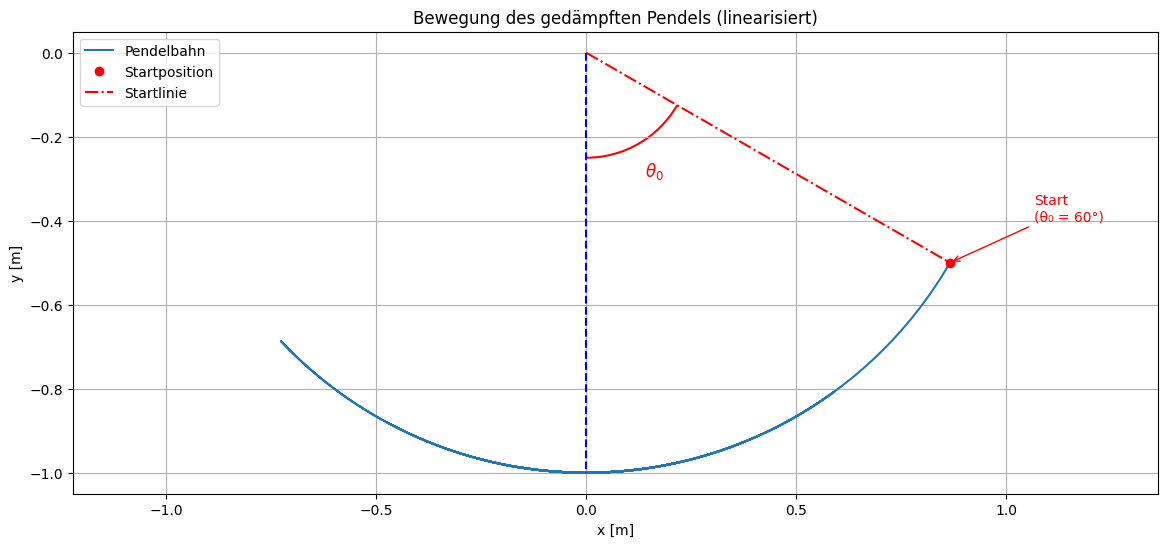

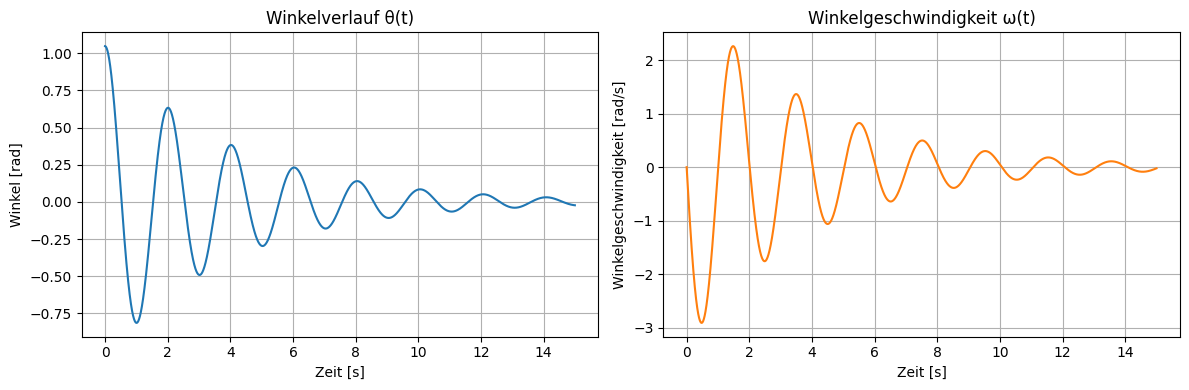

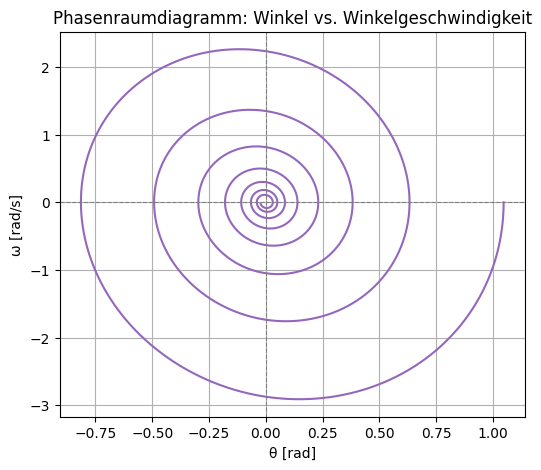

In [2]:
import numpy as np                      # Numpy wird für die numerischen Berechnungen benötigt (z.B. sin, cos, linspace)
from scipy.integrate import solve_ivp   # SciPy wird genutzt, um das Anfangswertproblem zu lösen
import matplotlib.pyplot as plt         # Matplotlib wird für die grafische Darstellung der Ergebnisse verwendet
import matplotlib.patches as patches    # Für den Winkelbogen (Zeichnung im Diagramm am Ende)

# Parameter
L = 1                   # Pendellänge in Metern
m = 1                   # Masse des Pendels in kg
b = 0.5                 # Dämpfung in Ns·m/rad (vereinfacht als lineare Dämpfung für Rotationssystem behandelt)
g = 9.81                # Erdbeschleunigung in m/s²
steps = 20000           # Anzahl der Zeitschritte für die Simulation (hohe Auflösung)
t_max = 15              # Maximale Simulationszeit in Sekunden
theta0 = np.pi / 3      # Anfangswinkel des Pendels (60° in Radiant)
omega0 = 0              # Anfangsgeschwindigkeit (ω0 = θ'(t=0) = (dθ/dt|t=0) = 0); Pendel startet aus dem Stillstand ohne Anfangsgeschwindigkeit (nur Anfangsauslenkung theta0)

# Zeitpunkte für die Auswertung
# t_eval enthält 20.000 gleichmäßig verteilte Zeitpunkte zwischen 0 und t_max
# Diese Zeitpunkte werden später an die Funktion solve_ivp übergeben, damit die Lösung
# des Differentialgleichungssystems an diesen Zeitpunkten berechnet wird.
t_eval = np.linspace(0, t_max, steps) 

# Definition des Differentialgleichungssystems in erster Ordnung (linearisierte Pendelgleichung)
# Die Pendelbewegung wird als System von zwei Gleichungen erster Ordnung formuliert:
# y[0] = θ (Winkelposition) und y[1] = ω (Winkelgeschwindigkeit)
# Gesucht: dθ/dt = ω und dω/dt = -(b/m) * ω - (g/L) * θ
def pendel(t, y):
    """
    Diese Funktion beschreibt die Pendelbewegung als System von zwei Differentialgleichungen erster Ordnung:
    1. dθ/dt = ω (Winkelgeschwindigkeit)
    2. dω/dt = -(b/m) * ω - (g/L) * θ (gedämpfte Schwingung, linearisierte Pendelgleichung)

    Inputs:
    - t (float): Der aktuelle Zeitpunkt. 
        - Dieser Wert wird vom Solver `solve_ivp` übergeben. Obwohl der Zeitpunkt nicht direkt in den Berechnungen verwendet wird,
        ist er erforderlich, damit der Solver das Problem korrekt lösen kann, da `solve_ivp` den aktuellen Zeitpunkt benötigt,
        um die numerische Lösung über die Zeit zu berechnen.

    - y (List[float]): Ein Vektor mit zwei Werten:
        - y[0] = θ (Winkel des Pendels in Radiant)
        - y[1] = ω (Winkelgeschwindigkeit in Rad/s)
        - Dieser Vektor enthält die aktuellen Werte der Variablen des Systems und wird ebenfalls vom Solver `solve_ivp` bei jedem Schritt
        an die Funktion übergeben.

    Outputs:
    - List[float]: Ein Vektor mit den Ableitungen von θ und ω:
        - [dθ/dt, dω/dt] = [ω, -(b/m) * ω - (g/L) * θ]
        - Der erste Wert ist die Winkelgeschwindigkeit ω, also die Ableitung von θ nach der Zeit.
        - Der zweite Wert ist die Winkelbeschleunigung dω/dt, die durch die linearisierte Pendelgleichung berechnet wird.
        - Diese Ausgaben werden vom Solver `solve_ivp` verwendet, um die nächste Zeitstufe der Lösung zu berechnen.
    """

    theta, omega = y # Entpacken des Zustandsvektors y = [θ, θ'] = [θ, ω]

    # Die zweite Ableitung von θ (d²θ/dt² = dω/dt = α. Winkelbeschleunigung) basiert auf der linearen Bewegungsgleichung
    # α = dω/dt = -(b/m) * ω - (g/L) * θ (gedämpfte harmonische Schwingung)
    alpha = -(b / m) * omega - (g / L) * theta  # dω/dt = - (b/m) * ω - (g/L) * θ

    # Rückgabe der beiden Ableitungen als Liste
    return [omega, alpha] # [dθ/dt, dω/dt] = [ω, α]

# Numerische Lösung des Differentialgleichungssystems mit solve_ivp (Runge-Kutta-Verfahren)
# solve_ivp löst das Anfangswertproblem für gewöhnliche Differentialgleichungen
# Der Rückgabewert 'sol' enthält die numerische Lösung der Gleichungen über den angegebenen Zeitraum
# Anfangswerte: θ(0) = theta0, ω(0) = omega0
sol = solve_ivp(pendel,             # Funktion, die das Differentialgleichungssystem beschreibt
                [0, t_max],         # Zeitintervall [Startzeit, Endzeit] für die Berechnung
                [theta0, omega0],   # Anfangszustand: [θ(0), ω(0)] = [theta0, omega0] = [np.pi / 3, 0] (Start aus der Ruheposition)
                t_eval=t_eval,      # Zeitpunkte, an denen die Lösung berechnet werden soll
                method='RK45')      # Das Runge-Kutta-Verfahren (4. & 5. Ordnung) zur numerischen Lösung

# Berechnung der Positionen des Pendels in der x-y-Ebene basierend auf den Winkeln θ(t)
# Um den Pendelkörper im Raum zu beschreiben, benötigen wir die kartesischen Koordinaten
# mit den Beziehungen: x = L * sin(θ) und y = -L * cos(θ), wobei das Pendel am Ursprung (0, 0) befestigt ist.
theta = sol.y[0]        # θ(t): Die Winkelpositionen des Pendels zu den jeweiligen Zeitpunkten
x = L * np.sin(theta)   # Berechnung der x-Position: x(t) = L * sin(θ(t)). Dies beschreibt, wie weit der Pendelkörper horizontal (also in Richtung der x-Achse) von der Aufhängung entfernt ist, abhängig vom Winkel θ.
y = -L * np.cos(theta)  # Berechnung der y-Position: y(t) = -L * cos(θ(t)). Dies beschreibt, wie weit der Pendelkörper in vertikaler Richtung (also in Richtung der y-Achse) von der Aufhängung entfernt ist. Das negative Vorzeichen sorgt dafür, dass sich der Pendelkörper nach unten bewegt, da die y-Achse nach oben zeigt.


# ================================================================
# VISUALISIERUNG DER PENDLELBEWEGUNG UND ZEITVERLÄUFE
# ================================================================

# -----------------------------
# Plot 1: Pendelbahn in der x-y-Ebene
# -----------------------------
# Dieser Plot zeigt die reale Bahn des Pendels in der 2D-Ebene.

plt.figure(figsize=(14, 6))  # Großes Format für bessere Darstellung
plt.plot(x, y, label='Pendelbahn')  # Bahnkurve des Pendels
plt.xlabel('x [m]')  # x-Achse: horizontale Auslenkung
plt.ylabel('y [m]')  # y-Achse: vertikale Position
plt.title('Bewegung des gedämpften Pendels (linearisiert)')  # Titel
plt.axis('equal')  # Gleiche Skalierung der Achsen (Kreisbahn korrekt dargestellt)
plt.grid(True)     # Gitternetz für bessere Lesbarkeit

origin = (0, 0)  # Koordinatenursprung = Aufhängepunkt

# --- Startposition markieren ---
plt.plot(x[0], y[0], 'ro', label='Startposition')  # Roter Punkt am Anfang
plt.annotate(f'Start\n(θ₀ = {np.degrees(theta0):.0f}°)',  # Winkel in Grad
             xy=(x[0], y[0]), xytext=(x[0] + 0.2, y[0] + 0.1),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10, color='red')

# --- Linien vom Ursprung zu Startposition ---
plt.plot([origin[0], x[0]], [origin[1], y[0]], 'r-.', label='Startlinie')  # Rot gestrichelt

# --- Winkelbogen θ₀ einzeichnen ---
theta0_deg = np.degrees(theta0)  # Umrechnung in Grad für Darstellung
arc_radius = 0.5  # Radius des Winkelbogens
arc = patches.Arc(origin, arc_radius, arc_radius, angle=0,
                  theta1=-90, theta2=-90 + theta0_deg,
                  color='red', linewidth=1.5)
plt.gca().add_patch(arc)  # Bogen ins aktuelle Achsenobjekt einfügen
plt.plot([0,0], [0,-1], 'b--') # Vertikale Linie

# --- Beschriftung θ₀ am Winkelbogen platzieren ---
theta_mid_rad = np.radians(-90 + theta0_deg / 2)  # Mittelwertwinkel für Textposition
label_radius = arc_radius * 0.65  # Etwas näher am Ursprung als der Bogen selbst
x_label = label_radius * np.cos(theta_mid_rad)
y_label = label_radius * np.sin(theta_mid_rad)
plt.text(x_label, y_label, r'$\theta_0$', fontsize=12, color='red',
         ha='center', va='center')  # Mathematischer Winkel in LaTeX

plt.legend(loc='upper left')  # Legende platzieren
plt.show()  # Plot anzeigen

# -----------------------------
# Plot 2: Zeitverlauf von Winkel θ(t) und Winkelgeschwindigkeit ω(t)
# -----------------------------
# Darstellung der Zustandsgrößen über die Zeit in zwei Teilplots

plt.figure(figsize=(12, 4))  # Querformat für nebeneinander liegende Plots

# --- Subplot links: θ(t) ---
plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[0], color='tab:blue')  # θ(t)
plt.title('Winkelverlauf θ(t)')
plt.xlabel('Zeit [s]')
plt.ylabel('Winkel [rad]')
plt.grid(True)

# --- Subplot rechts: ω(t) ---
plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[1], color='tab:orange')  # ω(t)
plt.title('Winkelgeschwindigkeit ω(t)')
plt.xlabel('Zeit [s]')
plt.ylabel('Winkelgeschwindigkeit [rad/s]')
plt.grid(True)

plt.tight_layout()  # Optimiert Abstand zwischen den beiden Plots
plt.show()

# -----------------------------
# Plot 3: Phasenraumdarstellung θ vs. ω
# -----------------------------
# Dieser Plot zeigt den Zustand des Systems im Phasenraum
# (Winkel vs. Winkelgeschwindigkeit), was besonders für die
# Analyse des dynamischen Verhaltens nützlich ist.

plt.figure(figsize=(6, 5))
plt.plot(sol.y[0], sol.y[1], color='tab:purple')  # θ gegen ω
plt.xlabel('θ [rad]')
plt.ylabel('ω [rad/s]')
plt.title('Phasenraumdiagramm: Winkel vs. Winkelgeschwindigkeit')
plt.grid(True)
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')  # Nulllinie ω = 0
plt.axvline(0, color='gray', linewidth=0.8, linestyle='--')  # Nulllinie θ = 0
plt.show()


<!-- END QUESTION -->

**Aufgabe:** Die Funktion ` scipy.integrate.solve_ivp` bietet verschiedene Methoden zur Lösung an [[1]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html). Vergleichen Sie die Performance für die Methoden, die keine weiteren Eingaben erwarten (RK45, RK23 und DOP853). 

_Points:_ 3

## Vergleich der Performance für die Methoden

In dieser Aufgabe wird die Performance der verschiedenen Integrationsmethoden der Funktion `scipy.integrate.solve_ivp` verglichen. Ziel ist es, die Berechnungszeit für die numerische Lösung einer Differentialgleichung zu messen, die das Verhalten eines gedämpften Pendels beschreibt. Hierbei werden drei verschiedene Methoden verwendet: **RK45**, **RK23** und **DOP853**. Jede dieser Methoden hat unterschiedliche Eigenschaften in Bezug auf Genauigkeit und Effizienz.

Die Vorgehensweise umfasst die folgenden Schritte:

1. **Pendelparameter**: Für das Pendel sind physikalische Parameter wie Pendellänge (L), Masse (m), Dämpfung (b) und die Erdbeschleunigung (g) definiert. Der Anfangswinkel und die Anfangsgeschwindigkeit des Pendels sind ebenfalls festgelegt.

2. **Differentialgleichung**: Das Pendel wird durch ein System von zwei Differentialgleichungen beschrieben: die Winkelgeschwindigkeit und die Änderung der Winkelgeschwindigkeit in Bezug auf die Zeit. Diese Gleichungen werden in einer Funktion `pendel` zusammengefasst.

3. **Lösungsberechnung**: Um die Lösung der Differentialgleichung zu berechnen, wird die Funktion `solve_ivp` aus der SciPy-Bibliothek verwendet. Diese Funktion ermöglicht es, verschiedene Methoden zur numerischen Lösung der Differentialgleichungen auszuwählen. In dieser Aufgabe werden die Methoden **RK45**, **RK23** und **DOP853** verglichen.

4. **Performance-Vergleich**: Mithilfe des `timeit`-Moduls wird die Berechnungszeit für jede der drei Methoden gemessen, indem die Simulation 100-mal wiederholt wird. Dies ermöglicht einen Vergleich der Effizienz und Geschwindigkeit der Methoden bei der Lösung des Pendelproblems.

5. **Auswertung der Ergebnisse**: Am Ende wird die gemessene Zeit für jede Methode ausgegeben, um zu beurteilen, welche Methode bei der Lösung dieses spezifischen Problems am effizientesten ist.

Der Fokus dieser Aufgabe liegt auf der Analyse der Performance der verschiedenen Methoden und ihrer Eignung für die Lösung von Differentialgleichungen, die in vielen Bereichen der Physik und Ingenieurwissenschaften auftreten.

In [ ]:
import numpy as np  # Importiert das NumPy-Modul, um mit Arrays und mathematischen Funktionen zu arbeiten
from scipy.integrate import solve_ivp  # Importiert die Funktion "solve_ivp" aus SciPy, um Differentialgleichungen zu lösen
import timeit  # Importiert das "timeit"-Modul, um die Ausführungszeit von Funktionen zu messen

# --- Pendelparameter ---
L = 1                   # Pendellänge in Metern. Diese Konstante beschreibt, wie lang das Pendel ist.
m = 1                   # Masse des Pendels in Kilogramm. Das Pendel hat eine Masse von 1 kg.
b = 0.5                 # Dämpfung in Ns·m/rad. Dies beschreibt die Reibung bzw. Energieverlust aufgrund der Dämpfung (linear angenommen).
g = 9.81                # Erdbeschleunigung in m/s². Auf der Erde beträgt die Erdbeschleunigung 9.81 m/s².
steps = 20000           # Anzahl der Zeitschritte für die Simulation (hohe Auflösung). Es werden 20.000 Berechnungsschritte verwendet, um die Pendelbewegung zu simulieren.
t_max = 15              # Maximale Simulationszeit in Sekunden. Die gesamte Zeit, über die die Pendelbewegung berechnet wird.
theta0 = np.pi / 3      # Anfangswinkel des Pendels (60° in Radiant). Der Pendel beginnt bei 60° (π/3 Radiant).
omega0 = 0              # Anfangsgeschwindigkeit (ω0 = θ'(t=0) = (dθ/dt|t=0) = 0). Das Pendel startet aus dem Stillstand, ohne Anfangsgeschwindigkeit.

# --- Differentialgleichung für das Pendel ---
def pendel(t, y):
    """
    Diese Funktion beschreibt die Pendelbewegung als System von zwei Differentialgleichungen erster Ordnung:
    1. dθ/dt = ω (Winkelgeschwindigkeit)
    2. dω/dt = -(b/m) * ω - (g/L) * θ (gedämpfte Schwingung, linearisierte Pendelgleichung)

    Die Funktion gibt die Ableitungen von θ (Winkel) und ω (Winkelgeschwindigkeit) zurück.
    """
    theta, omega = y  # Entpackt den aktuellen Zustand des Pendels in den Winkel (theta) und die Winkelgeschwindigkeit (omega)
    
    # Berechnet die Ableitungen
    dtheta_dt = omega  # Die Winkelgeschwindigkeit ist die Ableitung des Winkels.
    domega_dt = -(b / m) * omega - (g / L) * theta  # Die Beschleunigung hängt von der Dämpfung (b) und der Schwere (g) ab.

    return [dtheta_dt, domega_dt]  # Gibt die beiden Differentialgleichungen zurück.

# --- Zeitbereich der Simulation ---
t_span = (0, t_max)    # Simulationszeitraum, von 0 bis zur maximalen Zeit t_max (15 Sekunden).
y0 = [theta0, omega0]  # Anfangszustand des Pendels: [Anfangswinkel, Anfangsgeschwindigkeit]

# --- Vergleichsfunktion mit Methode als Parameter ---
def solve_with(method):
    """
    Diese Funktion löst das Pendelproblem mit der gegebenen Methode und gibt die Lösung zurück.
    Sie verwendet die Funktion `solve_ivp` von SciPy, um die Differentialgleichung zu lösen.
    """
    sol = solve_ivp(pendel, t_span, y0, method=method, t_eval=np.linspace(0, t_max, steps))  
    # solve_ivp löst das Differentialgleichungssystem, wobei "method" die verwendete Lösungsmethode ist,
    # t_eval gibt die Zeitpunkte an, an denen die Lösung ausgewertet werden soll (hier 20.000 Schritte).
    return sol  # Gibt die Lösung der Differentialgleichung zurück.

# --- Zeitmessung für jede Methode ---
# Alle Methoden verwenden dieselbe ODE (lineares, gedämpftes Pendel), denselben Zeitbereich und dieselben Startwerte.

# Zeitmessung für RK45
rk45_timeit = timeit.timeit(lambda: solve_with('RK45'), number=100)  # 100 Läufe. Misst die Zeit, die benötigt wird, um die Lösung 100 Mal mit der RK45-Methode zu berechnen.

# Zeitmessung für RK23
rk23_timeit = timeit.timeit(lambda: solve_with('RK23'), number=100)  # 100 Läufe. Misst die Zeit für die RK23-Methode.

# Zeitmessung für DOP853
dop853_timeit = timeit.timeit(lambda: solve_with('DOP853'), number=100)  # 100 Läufe. Misst die Zeit für die DOP853-Methode.

# --- Ergebnisse anzeigen ---
# Gibt die gemessenen Zeiten für jede Methode aus.
print(f"RK45   : {rk45_timeit:.4f} s (100 Läufe)")  # Zeigt die Zeit für 100 Läufe der RK45-Methode an.
print(f"RK23   : {rk23_timeit:.4f} s (100 Läufe)")  # Zeigt die Zeit für 100 Läufe der RK23-Methode an.
print(f"DOP853 : {dop853_timeit:.4f} s (100 Läufe)")  # Zeigt die Zeit für 100 Läufe der DOP853-Methode an.


RK45   : 0.5964 s (100 Läufe)
RK23   : 1.5048 s (100 Läufe)
DOP853 : 0.5676 s (100 Läufe)


<!-- BEGIN QUESTION -->

**Aufgabe:** Stellen Sie die x- und y-Position des Pendels über die Zeit in einem Diagramm dar. 
Stellen Sie in einem zweiten Diagramm den Winkel über die Zeit dar.

Hinweis:
- Verwenden Sie die Lösung für die `RK45` Methode. 
- Verwenden Sie Liniendiagramme.

_Points:_ 10

## x- und y-Position des Pendels über die Zeit in einem Diagramm

In dieser Aufgabe wird die Bewegung eines Pendels mit einer gedämpften Schwingung simuliert, wobei die Lösung der Bewegung mit der Runge-Kutta-Methode 45 (RK45) berechnet wird. Das Ziel ist es, die Position des Pendels in der x- und y-Richtung sowie den Winkel des Pendels über die Zeit hinweg zu visualisieren. 

Der Prozess der Lösung umfasst die folgenden Schritte:

1. **Pendelparameter**: Die physikalischen Eigenschaften des Pendels wie Länge (L), Masse (m), Dämpfungsfaktor (b), und die Erdbeschleunigung (g) werden festgelegt. Der Anfangswinkel (θ0) und die Anfangsgeschwindigkeit (ω0) sind ebenfalls vorgegeben.

2. **Differentialgleichung**: Die Bewegung des Pendels wird durch eine linearisierte Differentialgleichung beschrieben, die sowohl die Winkelgeschwindigkeit als auch die Dämpfung berücksichtigt.

3. **Numerische Lösung**: Die Bewegung des Pendels wird mit der RK45-Methode numerisch integriert. Diese Methode ist bekannt für ihre hohe Genauigkeit und wird hier verwendet, um die Position und den Winkel des Pendels über die Zeit zu berechnen.

4. **Visualisierung**:
   - **x- und y-Positionen**: Die Position des Pendels in der horizontalen (x) und vertikalen (y) Richtung wird in zwei separaten Diagrammen dargestellt.
   - **Winkel**: Der Winkel des Pendels wird über die Zeit in einem dritten Diagramm angezeigt.

Ziel dieser Aufgabe ist es, die zeitliche Entwicklung der Pendelbewegung zu verstehen und zu visualisieren. Die erhaltenen Diagramme bieten Einblicke in die Schwingungsdynamik des Pendels und zeigen die Auswirkungen der Dämpfung auf seine Bewegung.


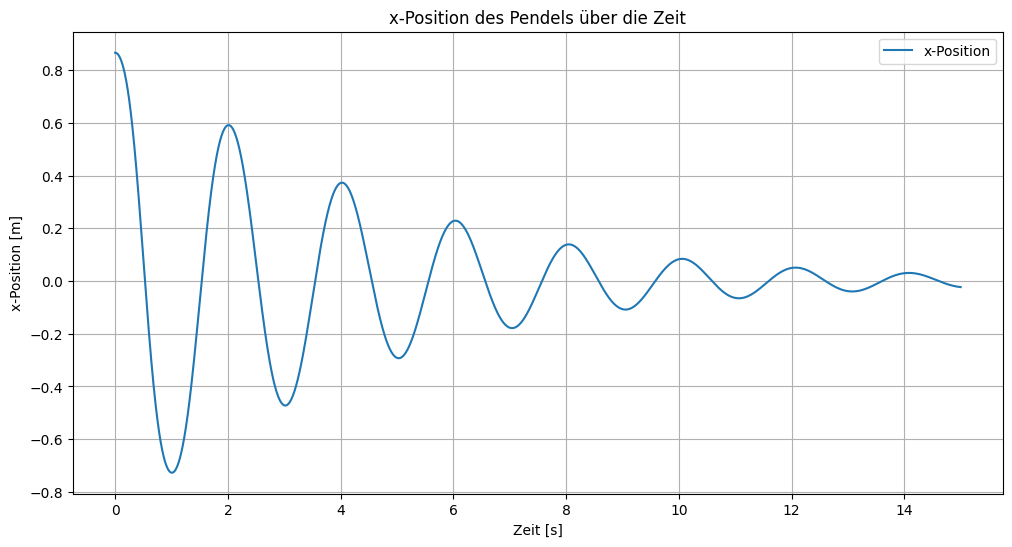

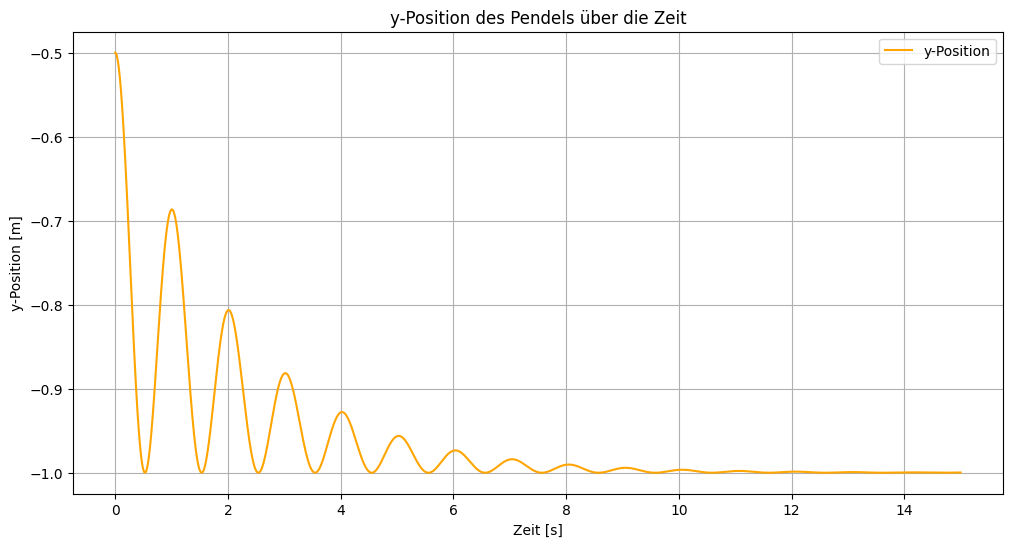

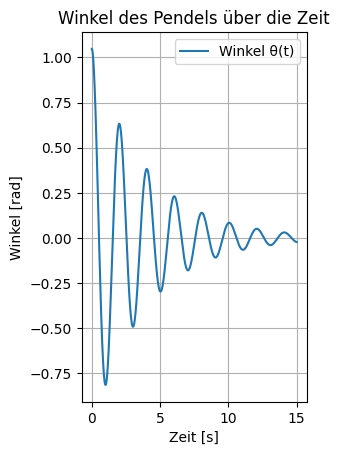

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# --- Pendelparameter ---
L = 1                   # Pendellänge in Metern
m = 1                   # Masse des Pendels in kg
b = 0.5                 # Dämpfung in Ns·m/rad
g = 9.81                # Erdbeschleunigung in m/s²
steps = 20000           # Anzahl der Zeitschritte für die Simulation (hohe Auflösung)
t_max = 15              # Maximale Simulationszeit in Sekunden
theta0 = np.pi / 3      # Anfangswinkel des Pendels (60° in Radiant)
omega0 = 0              # Anfangsgeschwindigkeit (ω0 = θ'(t=0) = (dθ/dt|t=0) = 0)

# --- Differentialgleichung für das Pendel ---
def pendel(t, y):
    """
    Diese Funktion beschreibt die Pendelbewegung als System von zwei Differentialgleichungen erster Ordnung:
    1. dθ/dt = ω (Winkelgeschwindigkeit)
    2. dω/dt = -(b/m) * ω - (g/L) * θ (gedämpfte Schwingung, linearisierte Pendelgleichung)
    """
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -(b / m) * omega - (g / L) * theta
    return [dtheta_dt, domega_dt]

# --- Zeitbereich der Simulation ---
t_span = (0, t_max)    # Simulationszeitraum
y0 = [theta0, omega0]  # Anfangszustand des Pendels

# --- Lösung mit RK45-Methode ---
sol = solve_ivp(pendel, t_span, y0, method='RK45', t_eval=np.linspace(0, t_max, steps))

# --- Berechnung der x- und y-Positionen ---
theta = sol.y[0]  # Der Winkel θ (erste Größe der Lösung)
x = L * np.sin(theta)  # x-Position des Pendels
y = -L * np.cos(theta)  # y-Position des Pendels

# --- Diagramm 1: x-Position des Pendels über die Zeit ---
plt.figure(figsize=(12, 6))
plt.plot(sol.t, x, label='x-Position')
plt.xlabel('Zeit [s]')
plt.ylabel('x-Position [m]')
plt.title('x-Position des Pendels über die Zeit')
plt.legend()
plt.grid(True)
plt.show()

# --- Diagramm 2: y-Position des Pendels über die Zeit ---
plt.figure(figsize=(12, 6))
plt.plot(sol.t, y, label='y-Position', color='orange')
plt.xlabel('Zeit [s]')
plt.ylabel('y-Position [m]')
plt.title('y-Position des Pendels über die Zeit')
plt.legend()
plt.grid(True)
plt.show()

# --- Diagramm 3: Winkel über die Zeit ---
plt.subplot(1, 2, 2)
plt.plot(sol.t, theta, label='Winkel θ(t)')
plt.xlabel('Zeit [s]')
plt.ylabel('Winkel [rad]')
plt.title('Winkel des Pendels über die Zeit')
plt.legend()
plt.grid(True)
plt.show()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Aufgabe:** Stellen Sie den Unterschied zwischen der 'RK45' Methode und der 'RK23' Methode dar. 

Erstellen Sie vier Liniendiagramme:
- x für beide Methoden über der Zeit
- y für beide Methoden über der Zeit
- Absoluter Unterschied von x zwischen beiden Methoden über der Zeit
- Absoluter Unterschied von y zwischen beiden Methoden über der Zeit

_Points:_ 10

## Unterschiede zwischen der 'RK45' Methode under der 'RK23' Methode

Dieses Python-Skript simuliert das Verhalten eines gedämpften Pendels und vergleicht die Ergebnisse zweier numerischer Integrationsmethoden, um die Bewegung des Pendels über die Zeit zu berechnen und darzustellen. Das Pendel wird durch eine Differentialgleichung modelliert, die sowohl die Rückstellkraft als auch die Dämpfung berücksichtigt.

Im Code werden die folgenden Schritte durchgeführt:

1. **Pendelsystem-Parameter**: Die physikalischen Parameter des Pendels, wie Pendellänge, Masse, Dämpfung und Erdbeschleunigung, werden festgelegt. Der Anfangswinkel und die Anfangsgeschwindigkeit werden ebenfalls definiert.

2. **Differentialgleichung des gedämpften Pendels**: Die Bewegung des Pendels wird durch eine gekoppelte Differentialgleichung erster Ordnung beschrieben, die sowohl den Winkel des Pendels (θ) als auch die Winkelgeschwindigkeit (ω) umfasst. Die Rückstellkraft (durch die Schwere des Pendels) und die Dämpfung (durch die Luftreibung) wirken zusammen auf das System.

3. **Numerische Lösung**: Die Differentialgleichung wird numerisch mit zwei verschiedenen Runge-Kutta-Verfahren (RK45 und RK23) gelöst:
   - **RK45**: Eine höhere Ordnung (5. Ordnung) Methode, die die Dormand-Prince-Methode verwendet.
   - **RK23**: Eine geringere Ordnung (3. Ordnung) Methode, die die Bogacki-Shampine-Methode verwendet.
   
4. **Vergleich der Lösungen**: Die Berechnungen der beiden Methoden werden miteinander verglichen, indem der absolute Unterschied in den berechneten Positionen des Pendels (sowohl in der x- als auch in der y-Richtung) über die Zeit dargestellt wird.

5. **Visualisierung der Ergebnisse**: Die Ergebnisse werden in vier verschiedenen Diagrammen angezeigt:
   - Die Position des Pendels in der x-Richtung und y-Richtung über die Zeit.
   - Der absolute Unterschied in den x- und y-Positionen zwischen den beiden Methoden (RK45 und RK23).

Das Ziel des Skripts ist es, die Auswirkungen unterschiedlicher Integrationsmethoden auf die Genauigkeit der Simulation und den Vergleich der Position des Pendels im Verlauf der Zeit zu analysieren. Es zeigt, wie die Wahl der numerischen Methode die Präzision in der Berechnung der Pendelbewegung beeinflussen kann.


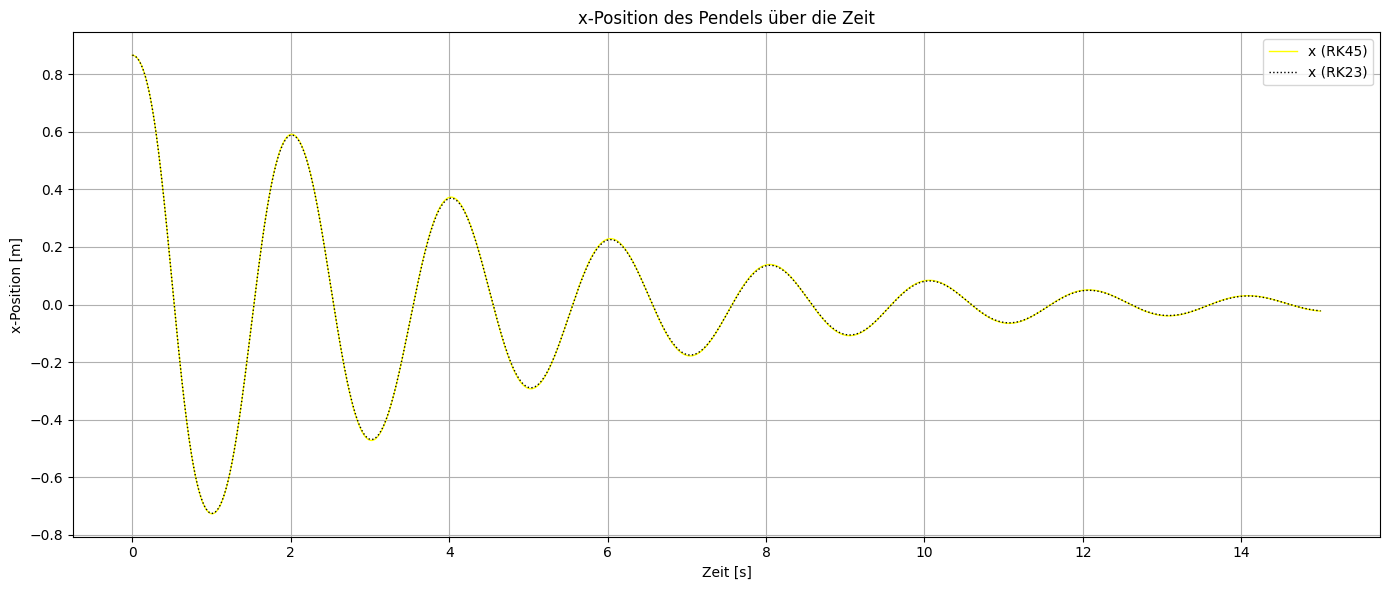

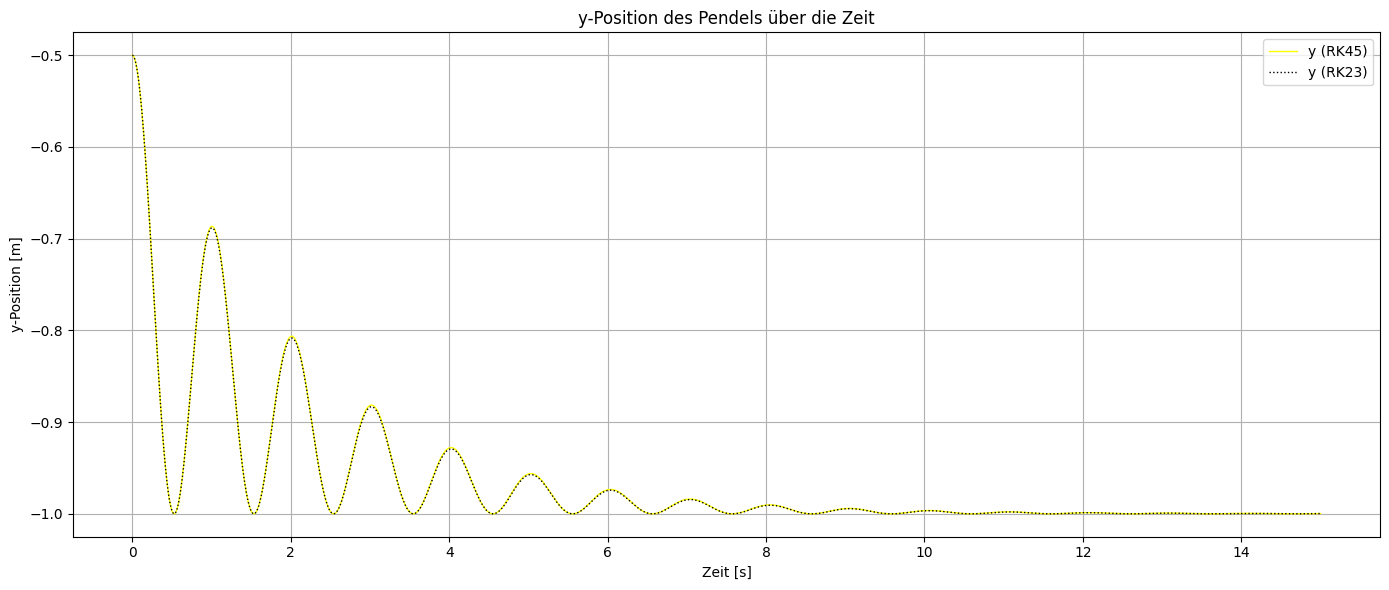

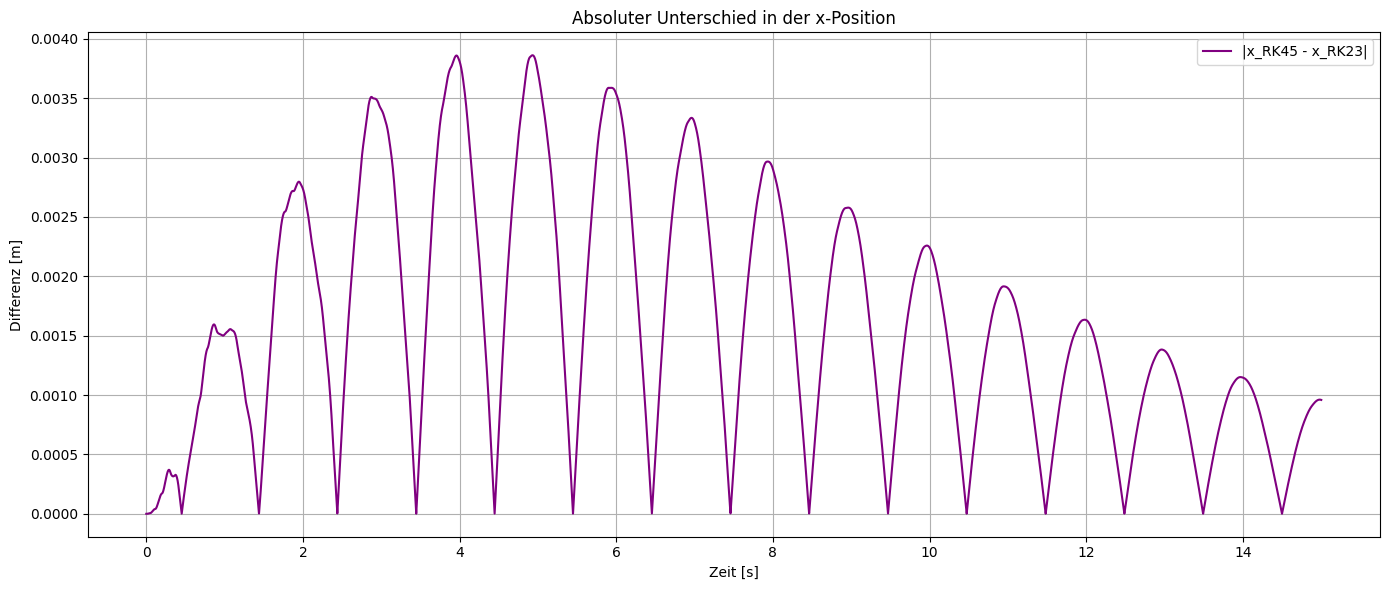

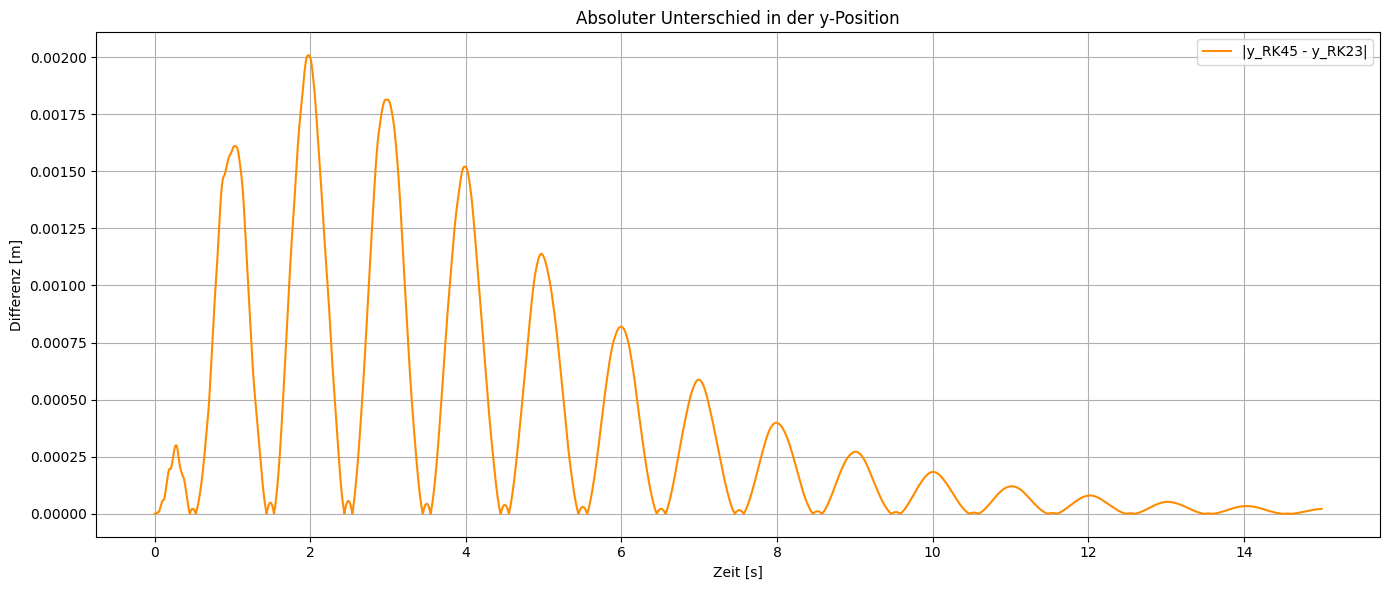

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# --- Pendelparameter ---
L = 1                   # Pendellänge in Metern
m = 1                   # Masse des Pendels in kg
b = 0.5                 # Dämpfung in Ns·m/rad
g = 9.81                # Erdbeschleunigung in m/s²
steps = 20000           # Anzahl der Zeitschritte für die Simulation
t_max = 15              # Maximale Simulationszeit in Sekunden
theta0 = np.pi / 3      # Anfangswinkel (60°)
omega0 = 0              # Anfangsgeschwindigkeit

# --- Differentialgleichung des gedämpften Pendels ---
def pendel(t, y):
    """
    Diese Funktion beschreibt das Pendelmodell als System von zwei 
    gekoppelten Differentialgleichungen erster Ordnung:
    
    y[0] = theta (Winkel), y[1] = omega (Winkelgeschwindigkeit)
    
    Rückgabe:
        [d(theta)/dt, d(omega)/dt]
    """

    theta, omega = y
    dtheta_dt = omega # Ableitung von theta ist omega
    domega_dt = -(b / m) * omega - (g / L) * theta # Linearisierte Gleichung: Dämpfung + Rückstellkraft
    return [dtheta_dt, domega_dt]

# --- Zeitschritte erzeugen ---
t_eval = np.linspace(0, t_max, steps)     # Zeitpunkte, zu denen die Lösung ausgewertet wird
t_span = (0, t_max)                       # Start- und Endzeit der Simulation
y0 = [theta0, omega0]                     # Anfangszustand (Winkel und Winkelgeschwindigkeit)

# --- Lösung der Differentialgleichung mit der RK45-Methode ---
sol_rk45 = solve_ivp(pendel, t_span, y0, method='RK45', t_eval=t_eval)  # Numerische Lösung mit Dormand-Prince-Methode (5. Ordnung)
theta_rk45 = sol_rk45.y[0]                 # Extrahiere die Winkelwerte (theta)
x_rk45 = L * np.sin(theta_rk45)            # Umrechnung von theta in x-Position (horizontale Projektion)
y_rk45 = -L * np.cos(theta_rk45)           # Umrechnung von theta in y-Position (vertikale Projektion)

# --- Lösung mit RK23-Methode ---
sol_rk23 = solve_ivp(pendel, t_span, y0, method='RK23', t_eval=t_eval)  # Numerische Lösung mit Bogacki-Shampine-Methode (3. Ordnung)
theta_rk23 = sol_rk23.y[0]               # Extrahiere die Winkelwerte (theta)
x_rk23 = L * np.sin(theta_rk23)          # Umrechnung in x-Position
y_rk23 = -L * np.cos(theta_rk23)         # Umrechnung in y-Position

# --- Berechnung des absoluten Unterschieds zwischen beiden Methoden ---
x_diff = np.abs(x_rk45 - x_rk23)         # Absoluter Unterschied in der x-Position zwischen RK45 und RK23
y_diff = np.abs(y_rk45 - y_rk23)         # Absoluter Unterschied in der y-Position zwischen RK45 und RK23

# === Diagramm 1: x-Position über die Zeit ===
plt.figure(figsize=(14, 6))                                      # Erzeugt eine neue Zeichenfläche mit Breite 14 und Höhe 6 Zoll
plt.plot(t_eval, x_rk45, label='x (RK45)', linewidth=1, color='yellow')     # Zeichnet die x-Position mit RK45 (rote Linie)
plt.plot(t_eval, x_rk23, label='x (RK23)', linestyle='dotted', linewidth=1, color='black')  # Zeichnet die x-Position mit RK23 (gestrichelte Linie)
plt.title('x-Position des Pendels über die Zeit')                # Titel des Diagramms
plt.xlabel('Zeit [s]')                                           # Beschriftung der x-Achse (Zeit in Sekunden)
plt.ylabel('x-Position [m]')                                     # Beschriftung der y-Achse (x-Position in Metern)
plt.legend()                                                     # Zeigt die Legende mit den Linienbeschriftungen
plt.grid(True)                                                   # Aktiviert das Hintergrundgitter für bessere Lesbarkeit
plt.tight_layout()                                               # Optimiert automatisch das Layout, damit nichts überlappt
plt.show()                                                       # Zeigt das fertige Diagramm an

# === Diagramm 2: y-Position über die Zeit ===
plt.figure(figsize=(14, 6))                                      # Neue Zeichenfläche mit gleicher Größe
plt.plot(t_eval, y_rk45, label='y (RK45)', linewidth=1, color='yellow')     # y-Position mit RK45 (rote Linie)
plt.plot(t_eval, y_rk23, label='y (RK23)', linestyle='dotted', linewidth=1, color='black')  # y-Position mit RK23 (gestrichelte Linie)
plt.title('y-Position des Pendels über die Zeit')                # Titel des Diagramms
plt.xlabel('Zeit [s]')                                           # x-Achse: Zeit
plt.ylabel('y-Position [m]')                                     # y-Achse: y-Position in Metern
plt.legend()                                                     # Zeigt die Beschriftungen der Linien
plt.grid(True)                                                   # Gitterlinien für bessere Ablesbarkeit
plt.tight_layout()                                               # Platzierung optimieren
plt.show()                                                       # Diagramm anzeigen

# === Diagramm 3: Absoluter Unterschied in x ===
plt.figure(figsize=(14, 6))                                      # Neue Zeichenfläche
plt.plot(t_eval, x_diff, label='|x_RK45 - x_RK23|', color='purple')     # Plotte den absoluten Unterschied der x-Werte in Lila
plt.title('Absoluter Unterschied in der x-Position')             # Titel für das Diagramm
plt.xlabel('Zeit [s]')                                           # x-Achse zeigt Zeit
plt.ylabel('Differenz [m]')                                      # y-Achse zeigt die Differenz in Metern
plt.legend()                                                     # Legende für die Kurve
plt.grid(True)                                                   # Gitter aktivieren
plt.tight_layout()                                               # Layout anpassen
plt.show()                                                       # Diagramm anzeigen

# === Diagramm 4: Absoluter Unterschied in y ===
plt.figure(figsize=(14, 6))                                      # Neue Zeichenfläche
plt.plot(t_eval, y_diff, label='|y_RK45 - y_RK23|', color='darkorange')  # Absoluter Unterschied der y-Werte in Orange
plt.title('Absoluter Unterschied in der y-Position')             # Titel für das Diagramm
plt.xlabel('Zeit [s]')                                           # x-Achse: Zeit
plt.ylabel('Differenz [m]')                                      # y-Achse: Differenz in Metern
plt.legend()                                                     # Zeigt die Legende
plt.grid(True)                                                   # Aktiviert das Gitter
plt.tight_layout()                                               # Optimiert das Layout
plt.show()                                                       # Zeigt das Diagramm an


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Aufgabe:** Animieren Sie das Pendel, sodass es für mindestens eine Periodendauer pendelt.

Hinweis:
- Animieren Sie nicht alle Zeitschritte, sondern z.B. nur jeden 100. Zeitschritt.
- Damit die Animation schneller erstellt wird, können Sie z.B. die zweite Hälfte der Daten verwerfen.
- Tipp für "hvplot": aus `import holoviews as hv` ist [hv.Path() hilfreich](https://holoviews.org/reference/elements/bokeh/Path.html)

_Points:_ 7

## Animation des Pendels

In diesem Python-Skript wird die Bewegung eines Pendels simuliert und eine animierte Darstellung der Pendelbewegung erstellt. Die Simulation basiert auf den Grundgleichungen der klassischen Mechanik, speziell auf der Differentialgleichung des Pendels, die die zeitliche Entwicklung des Winkels und der Winkelgeschwindigkeit beschreibt. Anstatt eine analytische Lösung zu suchen, wird die numerische Integration der Bewegung mit der Methode des Runge-Kutta-Integrators (RK23) durchgeführt.

Im Verlauf des Codes werden die folgenden Schritte durchgeführt:

1. **Bibliotheken laden**: Notwendige Bibliotheken wie `numpy`, `pandas`, `matplotlib`, `holoviews`, `imageio` und `scipy` werden importiert. Diese sind erforderlich für numerische Berechnungen, Datenstrukturierung, Plotting, Animation und die Lösung der Differentialgleichung.

2. **Physikalische Parameter**: Die Anfangsbedingungen und physikalischen Konstanten des Pendels (Erdbeschleunigung, Länge des Pendels, Anfangswinkel und -geschwindigkeit) werden festgelegt.

3. **Differentialgleichung**: Die Gleichung für das Pendel wird in der Funktion `pendel_ode` definiert, die die Ableitungen des Winkels und der Winkelgeschwindigkeit berechnet.

4. **Numerische Lösung**: Die Differentialgleichung wird mit `scipy.integrate.solve_ivp` und der Runge-Kutta-Methode RK23 über ein definiertes Zeitintervall numerisch gelöst.

5. **Datenextraktion und Vorbereitung**: Die Ergebnisse der Simulation (Winkel, Winkelgeschwindigkeit und Positionen) werden extrahiert und in einem Pandas DataFrame gespeichert. Dies ermöglicht eine einfache Weiterverarbeitung und Visualisierung.

6. **Visualisierung**: Mit `holoviews` wird die Pendelbewegung als interaktive Animation dargestellt. Es wird ein GIF erstellt, das die Bewegung des Pendels in jedem Zeitschritt zeigt.

7. **GIF-Erstellung**: Das GIF wird mit der Bibliothek `imageio` aus den einzelnen Frames der Animation erstellt und im Jupyter-Notebook angezeigt.

Dieses Skript bietet eine anschauliche Möglichkeit, die Dynamik eines Pendels zu simulieren und interaktive, animierte Visualisierungen zu erzeugen. Die numerische Lösung der Bewegung ermöglicht eine realistische Darstellung auch für größere Auslenkungen des Pendels, bei denen die Näherung für kleine Winkel nicht mehr gültig ist.


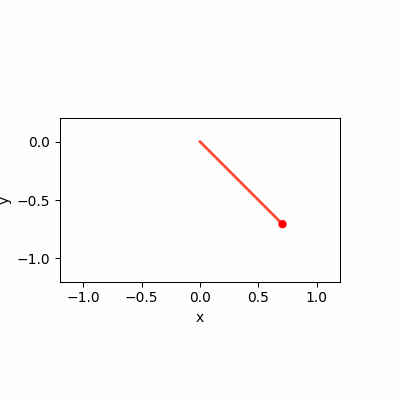

In [7]:
# --- Bibliotheken laden --- 
import numpy as np                      # Für numerische Berechnungen
import pandas as pd                     # Für Datenstrukturierung und Tabellen
from IPython.display import Image, display  # Um Bilder direkt in Jupyter-Notebooks anzuzeigen
import holoviews as hv                  # Für interaktive/animierte Visualisierungen
import hvplot.pandas                    # Ermöglicht direktes Plotten von Pandas-DataFrames mit HoloViews
import matplotlib.pyplot as plt         # Für manuelle Zeichnung und Konvertierung von Plots in Bilder
import imageio.v2 as imageio            # Für das Erstellen von GIF-Animationen aus Einzelbildern
from scipy.integrate import solve_ivp   # Für numerische Lösung von Differentialgleichungen

# HoloViews mit Matplotlib-Backend aktivieren
hv.extension('matplotlib')

# --- Physikalische Parameter des Pendels ---
g = 9.81                 # Erdbeschleunigung in m/s²
L = 1.0                  # Länge des Pendels in Metern
theta0 = np.pi / 4       # Anfangsauslenkung in Radiant (π/4 = 45°)
omega0 = 0.0             # Anfangsgeschwindigkeit (ruhend)
t_max = 10               # Gesamtdauer der Simulation in Sekunden
dt = 0.05                # Zeitschritt für Ausgabe / GIF-Bildrate

# --- Differentialgleichung für das Pendel ---
def pendel_ode(t, y):
    """
    t   : Zeit (nicht benutzt, da die Gleichung zeitinvariant ist)
    y   : Zustandsvektor [theta, omega]
    Rückgabe: Zeitableitung [dtheta/dt, domega/dt]
    """
    theta, omega = y
    dtheta_dt = omega
    domega_dt = - (g / L) * np.sin(theta)  # Nichtlineare Gleichung (ohne Kleinwinkelnäherung)
    return [dtheta_dt, domega_dt]

# --- Zeitpunkte für die Auswertung ---
t_eval = np.arange(0, t_max, dt)

# --- Numerische Lösung mit solve_ivp und RK23 (Runge-Kutta 2(3)) ---
sol = solve_ivp(
    pendel_ode,              # Differentialgleichung
    [0, t_max],                # Zeitintervall
    [theta0, omega0],          # Anfangsbedingungen
    method='RK23',             # Integrationsmethode
    t_eval=t_eval              # Auswerte-Zeitpunkte
)

# --- Lösung extrahieren ---
theta = sol.y[0]               # Winkelverlauf
omega = sol.y[1]               # Winkelgeschwindigkeit
t = sol.t                      # Zeitpunkte
x = L * np.sin(theta)          # x-Position der Masse (kartesisch)
y = -L * np.cos(theta)         # y-Position der Masse (kartesisch)

# --- Daten in einem Pandas-DataFrame zusammenfassen ---
df = pd.DataFrame({
    't': t,
    'theta': theta,
    'omega': omega,
    'x': x,
    'y': y
})

# --- Vorbereitung für die Animation ---
x_anim, y_anim = df['x'].values, df['y'].values

def pendel_frame(i):
    """
    Erzeugt ein HoloViews-Objekt für den i-ten Zeitschritt:
    - Linie vom Ursprung zur Masse
    - Masse als roter Punkt
    - Spur (Pfad) der bisherigen Bewegung
    """
    line = hv.Curve(([0, x_anim[i]], [0, y_anim[i]]))  # Pendelstange
    mass = hv.Points(
        ([x_anim[i]], [y_anim[i]], [10]),
        kdims=['x', 'y'], vdims=['size']
    ).opts(color='red', marker='o')                    # Masse (Kugel)
    trail = hv.Curve((x_anim[:i+1], y_anim[:i+1])).opts(color='gray', alpha=0.5)  # Pfad der Masse
    return (trail * line * mass).opts(
        xlim=(-1.2, 1.2),      # feste x-Achse
        ylim=(-1.2, 0.2),      # feste y-Achse
        aspect='equal',        # Verhältnis x:y = 1:1
        framewise=True         # Zoom nicht automatisch anpassen
    )

# --- GIF erzeugen ---
gif_filename = 'pendel_animation.gif'        # Name der Ausgabedatei
renderer = hv.renderer('matplotlib')         # Holoviews mit Matplotlib als Renderer

with imageio.get_writer(gif_filename, mode='I', duration=dt) as writer:
    for i in range(0, len(t), 2):  # Nur jedes zweite Bild (um GIF kleiner zu halten)
        fig = renderer.get_plot(pendel_frame(i)).state   # Erzeuge Matplotlib-Figur
        fig.canvas.draw()
        img = np.array(fig.canvas.renderer.buffer_rgba())  # Konvertiere zu Bild-Array
        writer.append_data(img)                            # Füge Frame zum GIF hinzu
        plt.close(fig)                                     # Vermeidet Speicherüberlauf

# --- Anzeige des gespeicherten GIFs im Notebook ---
display(Image(filename=gif_filename))

<!-- END QUESTION -->

Führen Sie alle Zellen im Notebook aus und speichern Sie es.  
Danach können Sie mit der folgenden Zelle eine HTML-Datei erstellen.  
Eine mögliche `UserWarning` können Sie ignorieren.  
Bitte geben Sie das Notebook als `.ipynb` und `.html` Datei ab.

In [ ]:
#!jupyter nbconvert --to html EA2.ipynb